## Importing libraries

In [134]:
import pandas as pd
pd.set_option("display.max_columns", 300)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import json
import datetime
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score, f1_score
from sklearn import tree 
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_val_predict
from sklearn.model_selection import cross_validate
import itertools

In [2]:
from tqdm import tqdm

In [3]:
%%capture
from tqdm import tqdm_notebook
tqdm_notebook().pandas()

### Import cleaned dataset

In [4]:
cleaned_dataset = pd.read_csv('cleaned_dataset2008-2017.csv')
cleaned_dataset.head()

,aircraft_category,aircraft_damage,amateur_built,broad_phase_of_flight,engine_type,event_date,far_description,location,make,model,number_of_engines,purpose_of_flight,weather_condition,month,weekday,fatality,state,make_transformed,make_transformed_all,far_transformed
0,Airplane,Substantial,No,MANEUVERING,Reciprocating,2016-12-27,Part 91: General Aviation,"Bridgeport, AL",CESSNA,172,1.0,Personal,VMC,12,1,0,AL,cessna,cessna,Part_91_General_Aviation
1,Airplane,Substantial,No,TAXI,Reciprocating,2016-12-28,Part 91: General Aviation,"Prairie Du Sac, WI",CESSNA,172B,1.0,Personal,VMC,12,2,0,WI,cessna,cessna,Part_91_General_Aviation
2,Airplane,Substantial,No,APPROACH,Reciprocating,2016-12-16,Part 91: General Aviation,"Kewanee, IL",PIPER,PA28R,1.0,Personal,IMC,12,4,0,IL,piper,piper,Part_91_General_Aviation
3,Airplane,Substantial,No,TAKEOFF,Reciprocating,2016-12-16,Part 91: General Aviation,"Ionia, MI",STINSON,108-3,1.0,Personal,VMC,12,4,0,MI,stinson,stinson,Part_91_General_Aviation
4,Airplane,Minor,No,DESCENT,Reciprocating,2016-11-20,Part 135: Air Taxi & Commuter,"McGrath, AK",PIPER,PA 32R-300,1.0,Air_Carrier,VMC,11,6,0,AK,piper,piper,Part_135_Air_Taxi__Commuter


In [5]:
cleaned_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13111 entries, 0 to 13110
Data columns (total 20 columns):
aircraft_category        13111 non-null object
aircraft_damage          13111 non-null object
amateur_built            13111 non-null object
broad_phase_of_flight    13111 non-null object
engine_type              13111 non-null object
event_date               13111 non-null object
far_description          13111 non-null object
location                 13100 non-null object
make                     13110 non-null object
model                    13110 non-null object
number_of_engines        13111 non-null object
purpose_of_flight        13111 non-null object
weather_condition        13111 non-null object
month                    13111 non-null int64
weekday                  13111 non-null int64
fatality                 13111 non-null int64
state                    13111 non-null object
make_transformed         13111 non-null object
make_transformed_all     13111 non-null object
f

### Transform dataset for modeling

In [382]:
columns_for_model = ['aircraft_category', 'aircraft_damage', 'amateur_built', 'broad_phase_of_flight', 'engine_type', 'number_of_engines', 'purpose_of_flight', 'weather_condition', 'month', 'weekday', 'state', 'make_transformed', 'far_transformed','fatality']

In [383]:
data = cleaned_dataset[columns_for_model].copy()
data.head()

,aircraft_category,aircraft_damage,amateur_built,broad_phase_of_flight,engine_type,number_of_engines,purpose_of_flight,weather_condition,month,weekday,state,make_transformed,far_transformed,fatality
0,Airplane,Substantial,No,MANEUVERING,Reciprocating,1.0,Personal,VMC,12,1,AL,cessna,Part_91_General_Aviation,0
1,Airplane,Substantial,No,TAXI,Reciprocating,1.0,Personal,VMC,12,2,WI,cessna,Part_91_General_Aviation,0
2,Airplane,Substantial,No,APPROACH,Reciprocating,1.0,Personal,IMC,12,4,IL,piper,Part_91_General_Aviation,0
3,Airplane,Substantial,No,TAKEOFF,Reciprocating,1.0,Personal,VMC,12,4,MI,stinson,Part_91_General_Aviation,0
4,Airplane,Minor,No,DESCENT,Reciprocating,1.0,Air_Carrier,VMC,11,6,AK,piper,Part_135_Air_Taxi__Commuter,0


In [384]:
data.broad_phase_of_flight.value_counts()

LANDING          3707
TAKEOFF          2644
NOT-SPECIFIED    2156
MANEUVERING      1632
APPROACH         1130
CRUISE            401
TAXI              337
DESCENT           304
STANDING          264
GO-AROUND         244
CLIMB             211
UNKNOWN            56
OTHER              25
Name: broad_phase_of_flight, dtype: int64

In [ ]:
pd.crosstab(y_test, y_pred2, rownames=['True'], colnames=['Predicted'], margins=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13111 entries, 0 to 13110
Data columns (total 13 columns):
aircraft_category        13111 non-null object
amateur_built            13111 non-null object
broad_phase_of_flight    13111 non-null object
engine_type              13111 non-null object
number_of_engines        13111 non-null object
purpose_of_flight        13111 non-null object
weather_condition        13111 non-null object
month                    13111 non-null int64
weekday                  13111 non-null int64
state                    13111 non-null object
make_transformed         13111 non-null object
far_transformed          13111 non-null object
fatality                 13111 non-null int64
dtypes: int64(3), object(10)
memory usage: 1.3+ MB


In [385]:
target = data['broad_phase_of_flight']
data.drop('broad_phase_of_flight', axis = 1,inplace = True)

In [386]:
data.head()

,aircraft_category,aircraft_damage,amateur_built,engine_type,number_of_engines,purpose_of_flight,weather_condition,month,weekday,state,make_transformed,far_transformed,fatality
0,Airplane,Substantial,No,Reciprocating,1.0,Personal,VMC,12,1,AL,cessna,Part_91_General_Aviation,0
1,Airplane,Substantial,No,Reciprocating,1.0,Personal,VMC,12,2,WI,cessna,Part_91_General_Aviation,0
2,Airplane,Substantial,No,Reciprocating,1.0,Personal,IMC,12,4,IL,piper,Part_91_General_Aviation,0
3,Airplane,Substantial,No,Reciprocating,1.0,Personal,VMC,12,4,MI,stinson,Part_91_General_Aviation,0
4,Airplane,Minor,No,Reciprocating,1.0,Air_Carrier,VMC,11,6,AK,piper,Part_135_Air_Taxi__Commuter,0


In [387]:
#One hot encode the training data and show the resulting dataframe with proper column names
ohe = OneHotEncoder()

ohe.fit(data)
data_ohe = ohe.transform(data).toarray()

ohe_df = pd.DataFrame(data_ohe, columns=ohe.get_feature_names(data.columns))

ohe_df.head()

,aircraft_category_Airplane,aircraft_category_Balloon,aircraft_category_Glider,aircraft_category_Gyrocraft,aircraft_category_Gyroplane,aircraft_category_Helicopter,aircraft_category_Powered_Parachute,aircraft_category_Rocket,aircraft_category_Ultralight,aircraft_category_Unknown,aircraft_category_Weight-Shift,aircraft_damage_Destroyed,aircraft_damage_Minor,aircraft_damage_NOT-SPECIFIED,aircraft_damage_Substantial,amateur_built_No,amateur_built_Yes,engine_type_None,engine_type_Reciprocating,engine_type_Turbo_Fan,engine_type_Turbo_Jet,engine_type_Turbo_Prop,engine_type_Turbo_Shaft,engine_type_Unknown,engine_type_other,number_of_engines_0.0,number_of_engines_1.0,number_of_engines_2.0,number_of_engines_3.0,number_of_engines_4.0,number_of_engines_Unknown,purpose_of_flight_Aerial_Application,purpose_of_flight_Aerial_Observation,purpose_of_flight_Air_Carrier,purpose_of_flight_Air_Drop,purpose_of_flight_Air_Race_Show,purpose_of_flight_Banner_Tow,purpose_of_flight_Business,purpose_of_flight_Executive_Corporate,purpose_of_flight_External_Load,purpose_of_flight_Ferry,purpose_of_flight_Firefighting,purpose_of_flight_Flight_Test,purpose_of_flight_Glider_Tow,purpose_of_flight_Instructional,purpose_of_flight_Other_Work_Use,purpose_of_flight_Personal,purpose_of_flight_Positioning,purpose_of_flight_Public_Aircraft,purpose_of_flight_Public_Aircraft__Federal,purpose_of_flight_Public_Aircraft__Local,purpose_of_flight_Public_Aircraft__State,purpose_of_flight_Skydiving,purpose_of_flight_Unknown,weather_condition_IMC,weather_condition_UNK,weather_condition_Unknown,weather_condition_VMC,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,state_AK,state_AL,state_AO,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_GM,state_GU,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MP,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_ON,state_OR,state_PA,state_PO,state_PR,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VI,state_VT,state_WA,state_WI,state_WV,state_WY,state_unknown,make_transformed_aero,make_transformed_aeronca,make_transformed_air,make_transformed_airbus,make_transformed_american,make_transformed_aviat,make_transformed_ayres,make_transformed_beech,make_transformed_bell,make_transformed_bellanca,make_transformed_boeing,make_transformed_cessna,make_transformed_champion,make_transformed_cirrus,make_transformed_dehavilland,make_transformed_diamond,make_transformed_eurocopter,make_transformed_grumman,make_transformed_hughes,make_transformed_luscombe,make_transformed_maule,make_transformed_mcdonnell,make_transformed_mooney,make_transformed_north,make_transformed_other,make_transformed_piper,make_transformed_robinson,make_transformed_rockwell,make_transformed_schweizer,make_transformed_stinson,make_transformed_taylorcraft,make_transformed_unknown,far_transformed_Part_121_Air_Carrier,far_transformed_Part_129_Foreign,far_transformed_Part_133_Rotorcraft_Ext_Load,far_transformed_Part_135_Air_Taxi__Commuter,far_transformed_Part_137_Agricultural,far_transformed_Part_91_General_Aviation,far_transformed_Public_Aircraft,far_transformed_Public_Use,far_transformed_Unknown,far_transformed_other,fatality_0,fatality_1
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [388]:
target.value_counts()

LANDING          3707
TAKEOFF          2644
NOT-SPECIFIED    2156
MANEUVERING      1632
APPROACH         1130
CRUISE            401
TAXI              337
DESCENT           304
STANDING          264
GO-AROUND         244
CLIMB             211
UNKNOWN            56
OTHER              25
Name: broad_phase_of_flight, dtype: int64

In [136]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm,  cmap=cmap, aspect='auto') #Create the basic matrix.

    #Add title and Axis Labels
#     plt.figure()
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    #Add appropriate Axis Scales
    class_names = set(classes) #Get class labels to add to matrix
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=90)
    plt.yticks(tick_marks, class_names)

    #Add Labels to Each Cell
    thresh = cm.max() / 2. #Used for text coloring below
    #Here we iterate through the confusion matrix and append labels to our visualization.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    #Add a Side Bar Legend Showing Colors
    plt.colorbar()
    return plt.show()

### Logistic regression - one-to-many

In [76]:
from sklearn.preprocessing import label_binarize
from scipy import interp

In [83]:
def display_metrics_score(true, preds, proba, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds, labels = list(true.unique()), average='weighted')
    n_classes = len( list(target.unique()))
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    true = label_binarize(true, classes=list(true.unique()))
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(true[:,i], proba[:, i].ravel())
        roc_auc[i] = auc(fpr[i], tpr[i])
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

     # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    for i in range(n_classes):
        print("RocAUC-Score {}: {}".format(list(true.unique()))[i], roc_auc[i]))
    return acc, f1, roc_auc['macro'], fpr, tpr

In [389]:
kf = KFold(n_splits=5,shuffle=True)

metrics_log = []

with tqdm_notebook(desc="Split", total=5) as progress:
    for train_index, test_index in tqdm(kf.split(ohe_df, target)):
        print(train_index,test_index)
        data_train, data_test = ohe_df.loc[train_index], ohe_df.loc[test_index] 
        target_train, target_test = target[train_index], target[test_index]
        clsf_log = LogisticRegression(random_state=2, solver='liblinear', multi_class='auto').fit(data_train, target_train)
        predictions = clsf_log.predict(data_test)
        probab=clsf_log.predict_proba(data_test)
        print(confusion_matrix(target_test, predictions))
        accuracy = clsf_log.score(data_test, target_test) 
        print (target_test.shape,probab.shape)
        target_names = list(target.unique())
        print(classification_report(target_test, predictions, target_names=target_names))
        acc_log, f1_log, roc_auc_log, fpr_log, tpr_log = display_metrics_score(target_test, predictions, probab, clsf_log)
        metrics_log.append((acc_log, f1_log, roc_auc_log, fpr_log, tpr_log))
        progress.update(1)



0it [00:00, ?it/s]

[    0     1     2 ... 13108 13109 13110] [   11    13    33 ... 13098 13099 13105]


//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


1it [00:01,  1.15s/it]

[[ 17   1   0   0   0 116  26  18   0   0  27   0   0]
 [  1   0   0   0   0  23   2   3   0   0   3   0   0]
 [  4   0   0   0   0  46  16   8   0   1  14   0   0]
 [  1   0   0   1   0  33  10   5   0   2  10   1   0]
 [  6   0   0   0   0  26   3   5   0   0   6   0   0]
 [  5   1   0   0   0 648  30  17   0   0  42   2   0]
 [  6   1   0   0   0  74 169  33   0   1  37   0   0]
 [  5   0   2   0   0 236  66  75   0   0  47   2   0]
 [  0   0   0   0   0   1   1   1   0   0   1   0   0]
 [  1   0   0   0   0  21   8  10   0   0   3   1   0]
 [ 11   1   0   0   0 351  77  27   0   1  95   2   0]
 [  0   0   0   0   0  48   2   6   0   1   4   6   0]
 [  0   0   0   0   0   2   1   3   0   0   3   0   0]]
(2623,) (2623, 13)
               precision    recall  f1-score   support

  MANEUVERING       0.30      0.08      0.13       205
         TAXI       0.00      0.00      0.00        32
     APPROACH       0.00      0.00      0.00        89
      TAKEOFF       1.00      0.02      0.03

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


2it [00:01,  1.06s/it]

[[ 14   0   0   1   0 109  29  22   0   2  32   1   0]
 [  5   0   0   0   0  19   5   4   0   1   6   0   0]
 [  3   0   0   0   0  37  10  12   0   0  11   0   0]
 [  0   1   1   0   0  23   8   5   0   2   8   2   0]
 [  6   0   0   0   1  37   4   1   0   0   7   0   0]
 [  5   0   0   0   0 626  30  26   0   0  51   3   0]
 [ 11   0   2   0   1  71 174  35   0   0  49   2   0]
 [ 11   0   1   3   1 232  61  75   0   2  56   2   0]
 [  1   0   0   0   0   4   2   0   0   0   0   0   0]
 [  0   0   0   0   0  32  11   5   0   1   3   4   0]
 [ 10   1   2   0   0 291  79  25   0   1 110   0   0]
 [  0   0   0   0   0  59   1   5   0   0   2   2   0]
 [  0   0   0   0   0   3   3   1   0   0   5   0   0]]
(2622,) (2622, 13)
               precision    recall  f1-score   support

  MANEUVERING       0.21      0.07      0.10       210
         TAXI       0.00      0.00      0.00        40
     APPROACH       0.00      0.00      0.00        73
      TAKEOFF       0.00      0.00      0.00

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


3it [00:03,  1.05s/it]

[[ 14   1   2   1   0 115  19  20   0   1  54   0   0]
 [  2   1   0   2   0  22   3   4   0   1  12   1   0]
 [  3   0   0   0   0  32  10   8   0   0  21   1   0]
 [  3   0   0   3   0  27   5   6   0   1  13   1   0]
 [  2   0   0   0   0  24   2   6   0   0  12   0   0]
 [  0   2   0   0   0 617  27  19   0   1  71   2   0]
 [ 15   0   3   0   0  78 150  30   0   0  71   0   0]
 [  6   0   0   1   1 229  57  62   0   5  70   3   0]
 [  0   0   0   0   0   4   1   1   0   0   1   0   0]
 [  2   0   0   0   0  26   5   4   0   2   5   3   0]
 [  5   0   0   0   0 330  61  18   0   1  98   2   0]
 [  1   0   0   0   0  42   3   8   0   0   1  10   0]
 [  0   0   0   0   0   5   2   3   0   0   3   0   0]]
(2622,) (2622, 13)
               precision    recall  f1-score   support

  MANEUVERING       0.26      0.06      0.10       227
         TAXI       0.25      0.02      0.04        48
     APPROACH       0.00      0.00      0.00        75
      TAKEOFF       0.43      0.05      0.09

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


4it [00:03,  1.00it/s]

[[ 13   0   1   0   0 147  29  25   0   2  44   2   0]
 [  3   0   0   0   0  23   6   4   0   0  12   0   0]
 [  0   0   2   0   0  36  21   8   0   0  12   1   0]
 [  6   0   0   1   0  33   8  10   0   1  13   1   0]
 [  3   0   1   0   0  31   3   6   0   0   8   0   0]
 [  2   1   0   0   0 651  26  22   0   0  58   3   0]
 [  8   0   0   0   0  64 148  32   0   0  47   0   0]
 [ 11   0   0   1   0 194  54  58   0   2  60   2   0]
 [  0   0   0   0   0   2   2   0   0   0   1   0   0]
 [  0   0   0   0   0  34  11   7   0   1   2   5   0]
 [ 14   1   0   0   0 308  68  23   0   0 102   0   0]
 [  1   0   0   0   0  53   1   4   0   1   5   7   0]
 [  0   0   0   0   0   1   1   1   0   0   6   0   0]]
(2622,) (2622, 13)
               precision    recall  f1-score   support

  MANEUVERING       0.21      0.05      0.08       263
         TAXI       0.00      0.00      0.00        48
     APPROACH       0.50      0.03      0.05        80
      TAKEOFF       0.50      0.01      0.03

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


5it [00:05,  1.09s/it]

[[ 15   0   1   3   1 128  24  21   0   2  30   0   0]
 [  3   0   0   0   0  21   5   7   0   0   7   0   0]
 [  0   0   1   1   0  39  20   9   0   0  14   0   0]
 [  7   0   0   2   0  27   5   6   0   2   9   1   0]
 [  4   0   0   0   0  30   2   2   0   0   6   0   0]
 [  5   0   1   0   0 601  32  12   0   2  64   2   0]
 [ 10   0   1   0   0  69 141  34   0   2  63   0   0]
 [ 10   1   1   4   0 247  66  70   0   4  56   2   2]
 [  0   0   0   0   0   2   0   0   0   0   0   0   0]
 [  2   0   0   2   0  33   4   8   0   4   4   0   0]
 [ 13   1   2   0   1 328  52  31   0   1 100   0   0]
 [  1   0   0   1   0  47   1   4   0   1   2   7   0]
 [  0   0   0   0   0   3   4   3   0   0   3   0   0]]
(2622,) (2622, 13)
               precision    recall  f1-score   support

  MANEUVERING       0.21      0.07      0.10       225
         TAXI       0.00      0.00      0.00        43
     APPROACH       0.14      0.01      0.02        84
      TAKEOFF       0.15      0.03      0.06

In [390]:
print("Accuracy: {}".format(np.array(metrics_log)[:,0].mean()))
print("F1-Score: {}".format(np.array(metrics_log)[:,1].mean()))
print("RocAUC-Score: {}".format(np.array(metrics_log)[:,2].mean()))

Accuracy: 0.3733496997312689
F1-Score: 0.3048815099943455
RocAUC-Score: 0.5130670730312379


### Class balancing - SMOTE

In [84]:
from imblearn.over_sampling import SMOTE

In [85]:
target.value_counts()

LANDING          3707
TAKEOFF          2644
NOT-SPECIFIED    2156
MANEUVERING      1632
APPROACH         1130
CRUISE            401
TAXI              337
DESCENT           304
STANDING          264
GO-AROUND         244
CLIMB             211
UNKNOWN            56
OTHER              25
Name: broad_phase_of_flight, dtype: int64

In [391]:
smt = SMOTE()
X_train, X_test, y_train, y_test = train_test_split(ohe_df, target, test_size = 0.2)

X_train, y_train = smt.fit_sample(X_train, y_train)

In [392]:
clsf_log = LogisticRegression(random_state=2, solver='liblinear', multi_class='auto').fit(X_train, y_train)
predictions = clsf_log.predict(X_test)
proba = clsf_log.predict_proba(X_test)
display_metrics_score(y_test, predictions, proba, clsf_log);

Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy: 0.14868471216164697
F1-Score: 0.17720745990210493
RocAUC-Score: 0.48362307927361625
RocAUC-Score: 0.39239360677835544
RocAUC-Score: 0.5031428763389257
RocAUC-Score: 0.563792245241242
RocAUC-Score: 0.4238683917533689
RocAUC-Score: 0.7151055539114136
RocAUC-Score: 0.617450583146252
RocAUC-Score: 0.4420262323245673
RocAUC-Score: 0.49234202401083604
RocAUC-Score: 0.4446756929832586
RocAUC-Score: 0.4190588353843635
RocAUC-Score: 0.4260106646825397
RocAUC-Score: 0.5504965622612681


In [102]:
pd.Series(y_train).value_counts()

APPROACH         2984
CRUISE           2984
STANDING         2984
NOT-SPECIFIED    2984
DESCENT          2984
TAKEOFF          2984
MANEUVERING      2984
TAXI             2984
CLIMB            2984
OTHER            2984
LANDING          2984
UNKNOWN          2984
GO-AROUND        2984
dtype: int64

In [393]:
kf = KFold(n_splits=5,shuffle=True)

metrics_log_sm = []

with tqdm_notebook(desc="Split", total=5) as progress:
    for train_index, test_index in tqdm(kf.split(X_train, y_train)):
        print(train_index,test_index)
#         data_train, data_test, target_train, target_test = train_test_split(ohe_df, target, test_size = 0.2)
#         data_train, target_train = smt.fit_sample(data_train, target_train)
        data_train, data_test = pd.DataFrame(X_train).loc[train_index], pd.DataFrame(X_train).loc[test_index] 
        target_train, target_test = pd.Series(y_train)[train_index], pd.Series(y_train)[test_index]
        clsf_log = LogisticRegression(random_state=2, solver='liblinear', multi_class='auto').fit(data_train, target_train)
        predictions = clsf_log.predict(X_test)
        probab=clsf_log.predict_proba(X_test)
        print(confusion_matrix(y_test, predictions))
        accuracy = clsf_log.score(X_test, y_test) 
        print (X_test.shape,probab.shape)
        target_names = list(target.unique())
        print(classification_report(y_test, predictions, target_names=target_names))
        acc_log, f1_log, roc_auc_log, fpr_log, tpr_log = display_metrics_score(y_test, predictions, probab, clsf_log)
        metrics_log_sm.append((acc_log, f1_log, roc_auc_log, fpr_log, tpr_log))
        progress.update(1)



0it [00:00, ?it/s]

[    0     1     2 ... 38269 38270 38271] [    3     4     5 ... 38253 38259 38261]




1it [00:04,  4.46s/it]

[[ 17  27  20  22  27  23  16   3   3  29   9  27  22]
 [  2   7   2   3   6   5   3   1   0   4   1  10   3]
 [  2   7  13  11  11   3   9   2   5   8   4   9  10]
 [  4  12   3   8   4   2   3   1   0  12   5   4   5]
 [  1   8   3   6  11   6   2   0   0   2   2   7   3]
 [ 38  67  67  41  88 144  24  13  21  71  28 138  23]
 [ 17  23  21  15  16  10 110  11   9  28   5  17  33]
 [ 19  45  32  23  36  38  42  24   6  41  17  64  28]
 [  1   0   0   2   1   1   0   0   0   0   0   0   0]
 [  4   3   1  10   4   9  10   5   0   5   0  11   0]
 [ 30  44  32  22  60  47  53  12   9  35  38  62  44]
 [  2   7   7   3   5   6   1   2   0   9   1  15   3]
 [  1   0   0   1   1   1   5   0   0   0   0   1   4]]
(2623, 181) (2623, 13)
               precision    recall  f1-score   support

  MANEUVERING       0.12      0.07      0.09       245
         TAXI       0.03      0.15      0.05        47
     APPROACH       0.06      0.14      0.09        94
      TAKEOFF       0.05      0.13      



2it [00:10,  4.80s/it]

[[ 17  28  18  23  24  30  18   3   4  26   8  26  20]
 [  2   5   3   3   4   4   4   1   0   7   1  10   3]
 [  5   5  12  11  11   4  10   2   5   7   4   8  10]
 [  5  10   4   9   5   2   4   1   0  11   3   4   5]
 [  0   7   7   4  10   7   2   1   0   2   1   7   3]
 [ 36  72  60  47  99 140  23  14  21  72  29 124  26]
 [ 17  25  23  14  17  12 111   8  10  28   4  15  31]
 [ 19  42  32  22  34  48  39  25   5  46  17  59  27]
 [  1   0   0   1   1   1   0   0   0   0   0   1   0]
 [  4   3   1  10   3   8   9   6   0   5   1  11   1]
 [ 30  42  32  26  61  43  54  11   8  35  38  67  41]
 [  2   5   8   2   5   7   2   1   0   9   2  16   2]
 [  1   0   0   1   1   1   5   0   0   0   0   1   4]]
(2623, 181) (2623, 13)
               precision    recall  f1-score   support

  MANEUVERING       0.12      0.07      0.09       245
         TAXI       0.02      0.11      0.03        47
     APPROACH       0.06      0.13      0.08        94
      TAKEOFF       0.05      0.14      



3it [00:15,  4.98s/it]

[[ 17  29  16  25  24  23  18   6   4  23  10  30  20]
 [  4   7   2   1   5   6   3   1   0   5   1   9   3]
 [  4   6  11  12  11   5   9   2   5   7   4   9   9]
 [  5   9   4   8   5   3   3   0   0  12   5   4   5]
 [  1   8   4   4  10   6   2   1   0   2   2   8   3]
 [ 45  65  56  44  93 135  26  17  20  72  31 132  27]
 [ 18  25  19  16  16   7 113  10   9  28   5  18  31]
 [ 19  45  34  20  36  39  41  22   5  43  19  66  26]
 [  1   0   0   2   1   1   0   0   0   0   0   0   0]
 [  3   4   1  10   6   6   8   4   0   5   2  11   2]
 [ 33  40  31  29  61  38  52  11  10  37  36  69  41]
 [  2   6   6   2   5   5   2   2   0   9   3  17   2]
 [  0   0   0   2   1   0   4   0   0   1   1   1   4]]
(2623, 181) (2623, 13)
               precision    recall  f1-score   support

  MANEUVERING       0.11      0.07      0.09       245
         TAXI       0.03      0.15      0.05        47
     APPROACH       0.06      0.12      0.08        94
      TAKEOFF       0.05      0.13      



4it [00:21,  5.33s/it]

[[ 14  27  17  26  26  26  17   5   4  26  10  26  21]
 [  2   7   2   3   4   4   3   3   0   5   2   9   3]
 [  4   6  12  13  12   4   9   2   5   7   4   6  10]
 [  5  11   2   8   5   2   4   1   0  11   5   4   5]
 [  0   8   4   6   9   7   2   1   0   2   1   7   4]
 [ 37  70  56  44 102 144  28  23  20  65  23 130  21]
 [ 13  26  25  14  19  11 108   9   8  29   6  16  31]
 [ 13  45  35  21  38  39  37  27   6  43  19  64  28]
 [  1   0   0   1   1   1   0   0   0   0   0   1   0]
 [  4   3   1  10   4   8   8   3   0   7   2  11   1]
 [ 27  44  29  28  66  44  52  11   9  35  37  64  42]
 [  3   5   6   4   4   7   2   1   0   9   2  16   2]
 [  0   0   0   2   1   1   4   0   0   0   1   1   4]]
(2623, 181) (2623, 13)
               precision    recall  f1-score   support

  MANEUVERING       0.11      0.06      0.08       245
         TAXI       0.03      0.15      0.05        47
     APPROACH       0.06      0.13      0.08        94
      TAKEOFF       0.04      0.13      



5it [00:28,  5.86s/it]

[[ 16  27  23  22  24  23  17   4   5  27   9  25  23]
 [  2   6   2   2   5   4   5   1   0   6   2   9   3]
 [  3   6  13  10  11   5   8   2   5   8   4   9  10]
 [  4  10   3   8   8   1   4   1   0  12   3   4   5]
 [  1   8   4   5   9   7   1   1   0   2   1   7   5]
 [ 40  66  62  44  96 134  23  14  22  69  35 133  25]
 [ 17  24  22  14  16  11 108  13   8  27   8  18  29]
 [ 15  42  30  21  36  47  39  24   5  44  19  64  29]
 [  1   0   0   1   1   1   0   0   0   0   0   1   0]
 [  3   3   2  10   4   7   7   3   1   9   2  11   0]
 [ 24  42  31  22  65  41  53  12   8  38  43  66  43]
 [  1   8   8   2   5   5   2   3   0   7   2  16   2]
 [  0   0   0   1   1   1   5   0   0   1   0   1   4]]
(2623, 181) (2623, 13)
               precision    recall  f1-score   support

  MANEUVERING       0.13      0.07      0.09       245
         TAXI       0.02      0.13      0.04        47
     APPROACH       0.07      0.14      0.09        94
      TAKEOFF       0.05      0.13      

In [394]:
print("Accuracy: {}".format(np.array(metrics_log_sm)[:,0].mean()))
print("F1-Score: {}".format(np.array(metrics_log_sm)[:,1].mean()))
print("RocAUC-Score: {}".format(np.array(metrics_log_sm)[:,2].mean()))

Accuracy: 0.14914220358368283
F1-Score: 0.17833776289763215
RocAUC-Score: 0.498222661248374


### Random Forest

In [424]:
kf = KFold(n_splits=5,shuffle=True)

metrics_rf = []

with tqdm_notebook(desc="Split", total=5) as progress:
    for train_index, test_index in tqdm(kf.split(ohe_df, target)):
        print(train_index,test_index)
        data_train, data_test = ohe_df.loc[train_index], ohe_df.loc[test_index] 
        target_train, target_test = target[train_index], target[test_index]
        rnd_forest = RandomForestClassifier(random_state = 42).fit(data_train, target_train)
        predictions = rnd_forest.predict(data_test)
        probab_rf=rnd_forest.predict_proba(data_test)
        print(confusion_matrix(target_test, predictions))
        accuracy = rnd_forest.score(data_test, target_test) 
        target_names = list(target.unique())
        print(classification_report(target_test, predictions, target_names=target_names))
        acc_rf, f1_rf, roc_auc_rf, fpr_rf, tpr_rf = display_metrics_score(target_test, predictions, probab_rf, rnd_forest)
        metrics_rf.append((acc_rf, f1_rf, roc_auc_rf, fpr_rf, tpr_rf))
        progress.update(1)



0it [00:00, ?it/s]

[    0     1     2 ... 13108 13109 13110] [    6    20    22 ... 13096 13100 13103]


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[ 30   0   5   2   2  82  20  29   0   3  43   0   0]
 [  3   0   1   3   1  19   8   5   0   0   9   1   0]
 [ 12   0   4   0   3  30  17   9   0   1  13   0   0]
 [  5   1   1   0   0  20   7  11   0   1   8   0   0]
 [  2   1   1   0   0  20   6   2   0   0   6   1   0]
 [ 46   9  10   7   3 420  29  85   0   7 120  11   0]
 [ 20   5   3   2   0  61 129  39   0   1  47   1   0]
 [ 28   5  10   2   6 157  67 116   0   0  59   4   0]
 [  1   0   1   0   0   0   0   0   0   0   2   0   0]
 [  4   0   1   0   0  17  10   8   0   4   5   1   0]
 [ 29   3  11   4   2 218  71  56   0   4 137   2   0]
 [  3   0   0   0   0  34   4   7   0   0   8   4   0]
 [  3   0   0   0   0   4   6   2   0   0   0   0   0]]
               precision    recall  f1-score   support

  MANEUVERING       0.16      0.14      0.15       216
         TAXI       0.00      0.00      0.00        50
     APPROACH       0.08      0.04      0.06        89
      TAKEOFF       0.00      0.00      0.00        54
      DE

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


1it [00:02,  2.97s/it]

Model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
Accuracy: 0.3217689668318719
F1-Score: 0.2990134617381149
RocAUC-Score: 0.6161311914323963
RocAUC-Score: 0.5055289491696168
RocAUC-Score: 0.4775359433469485
RocAUC-Score: 0.49035290693833683
RocAUC-Score: 0.5341857753595025
RocAUC-Score: 0.41231387955269017
RocAUC-Score: 0.7284045328321785
RocAUC-Score: 0.5293859308200544
RocAUC-Score: 0.4925544100801833
RocAUC-Score: 0.49899206658863304
RocAUC-Score: 0.4886971440104955
RocAUC-Score: 0.5260528300388981
RocAUC-Score: 0.5575408997955009
[    0     1   

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


2it [00:03,  2.36s/it]

[[ 14   3   7   5   0  89  36  32   0   3  34   4   0]
 [  5   1   3   2   0  12   3   2   0   3   7   1   0]
 [  5   0   3   0   2  22  10  15   0   1  18   1   0]
 [  9   1   1   3   1  18   7  14   0   0  11   2   0]
 [  9   1   3   1   0  19   4   5   0   0   5   0   0]
 [ 34   2   9   5   5 418  42  76   0   4 138   8   0]
 [ 21   3   4   4   4  60 140  49   0   2  60   2   1]
 [ 28   4   6   4   4 158  62  79   0   0  65   5   0]
 [  0   0   0   0   0   1   2   1   1   0   1   0   0]
 [  1   0   0   1   0  24   8  10   0   6   6   4   0]
 [ 30   4  10   7   2 199  66  50   0   2 138   6   0]
 [  4   0   2   1   2  30   3   9   0   4   8   9   0]
 [  0   0   0   0   0   0   2   2   0   0   3   0   0]]
               precision    recall  f1-score   support

  MANEUVERING       0.09      0.06      0.07       227
         TAXI       0.05      0.03      0.03        39
     APPROACH       0.06      0.04      0.05        77
      TAKEOFF       0.09      0.04      0.06        67
      DE

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


3it [00:04,  1.87s/it]

[[ 36   2   6   5   4  73  27  35   0   1  41   2   0]
 [  5   0   0   2   0  13   6   5   0   1   8   1   1]
 [  6   1   1   2   1  22   9  12   0   1  12   1   0]
 [  8   0   1   4   1  14   7   7   0   1   9   2   0]
 [  6   1   2   0   1  26   3  11   0   1   9   0   0]
 [ 38   4   6   2   3 426  29  82   0   4 119   3   0]
 [ 26   4   6   3   2  73 145  41   0   1  49   1   0]
 [ 45   1   9   4   0 141  51 100   0   3  66   1   0]
 [  0   0   0   0   0   4   1   0   0   0   0   0   0]
 [  7   0   0   0   0  14   6   6   0   4   8   2   0]
 [ 41   8   7   4   4 227  70  54   1   3 120   3   1]
 [  2   1   0   1   0  34   2   8   0   7  10   7   0]
 [  1   0   0   0   0   3   5   2   0   0   0   0   0]]
               precision    recall  f1-score   support

  MANEUVERING       0.16      0.16      0.16       232
         TAXI       0.00      0.00      0.00        42
     APPROACH       0.03      0.01      0.02        68
      TAKEOFF       0.15      0.07      0.10        54
      DE

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


4it [00:05,  1.50s/it]

[[ 27   2   5   3   5  65  33  25   0   1  35   2   0]
 [  2   0   0   0   0  10   6   9   0   0   9   0   0]
 [  8   1   6   1   1  15  15  12   0   0  14   2   0]
 [  6   2   1   8   1  17  10   6   0   1  15   0   0]
 [  6   0   1   0   1  22   8   1   0   0  12   1   0]
 [ 48   4   5   3   7 424  36  91   0   7 113  10   1]
 [ 30   0   2   3   2  46 153  30   1   2  53   0   1]
 [ 38   4  14  10   3 141  62  92   0   4  66   6   0]
 [  0   0   0   0   0   2   1   0   0   0   1   0   0]
 [  2   1   1   3   0  15   9   9   0   2   2   1   0]
 [ 43   1   5   6   3 216  62  77   0   4 119   5   1]
 [  6   2   1   1   1  25   4   7   0   3  17   4   0]
 [  2   1   0   1   0   2   2   4   0   0   2   0   1]]
               precision    recall  f1-score   support

  MANEUVERING       0.12      0.13      0.13       203
         TAXI       0.00      0.00      0.00        36
     APPROACH       0.15      0.08      0.10        75
      TAKEOFF       0.21      0.12      0.15        67
      DE

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


5it [00:05,  1.25s/it]

[[ 34   3   5   4   6  79  30  36   0   4  49   2   0]
 [  5   1   3   2   0  14   3   5   0   0  11   0   0]
 [ 11   2   3   3   0  27  12  14   1   0  19   0   0]
 [  3   2   3   2   1  25   7  11   0   2   5   1   0]
 [  8   1   1   1   0  12   2   5   0   1  15   0   0]
 [ 43   2   9   0   8 430  32  76   0  10 135   9   0]
 [ 16   1   1   1   0  43 120  45   0   4  67   2   0]
 [ 34   4   5   2   2 139  66  94   0   2  73   5   0]
 [  2   0   0   0   0   0   1   2   0   0   1   0   0]
 [  4   3   2   2   0  15   9  11   0   2  10   4   0]
 [ 29   5   8   3   3 219  57  57   0   3 118   6   0]
 [  3   0   0   1   0  39   2   5   0   2   4   6   0]
 [  1   0   0   0   0   0   5   2   0   0   0   0   0]]
               precision    recall  f1-score   support

  MANEUVERING       0.18      0.13      0.15       252
         TAXI       0.04      0.02      0.03        44
     APPROACH       0.07      0.03      0.05        92
      TAKEOFF       0.10      0.03      0.05        62
      DE

In [425]:
print("Accuracy: {}".format(np.array(metrics_rf)[:,0].mean()))
print("F1-Score: {}".format(np.array(metrics_rf)[:,1].mean()))
print("RocAUC-Score: {}".format(np.array(metrics_rf)[:,2].mean()))

Accuracy: 0.3162988734579076
F1-Score: 0.2940632848365003
RocAUC-Score: 0.4987824356579475


In [106]:
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 12, 16, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 6]
}

In [107]:
import time
rf_clf = RandomForestClassifier(random_state = 42)
start = time.time()
rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=5, verbose=10)
rf_grid_search.fit(ohe_df, target)

print(f"Testing Accuracy: {rf_grid_search.best_score_ :.2%}")
print(f"Total Runtime for Grid Search on Random Forest Classifier: {time.time() - start :.2f} seconds")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.303, total=   0.4s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.295, total=   0.3s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.298, total=   0.4s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s remaining:    0.0s


[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.305, total=   0.4s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.5s remaining:    0.0s


[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.315, total=   0.3s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=30 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.8s remaining:    0.0s


[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=30, score=0.324, total=   0.9s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=30 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.7s remaining:    0.0s


[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=30, score=0.314, total=   0.9s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=30 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    3.6s remaining:    0.0s


[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=30, score=0.312, total=   0.9s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=30 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    4.5s remaining:    0.0s


[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=30, score=0.321, total=   1.0s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=30 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    5.5s remaining:    0.0s


[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=30, score=0.328, total=   0.9s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.336, total=   3.3s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.324, total=   3.0s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.326, total=   3.2s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.329, total=   2.

[CV]  criterion=gini, max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=0.355, total=   0.2s
[CV] criterion=gini, max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=0.365, total=   0.2s
[CV] criterion=gini, max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=30 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=30, score=0.373, total=   0.5s
[CV] criterion=gini, max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=30 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=30, score=0.368, total=   0.5s
[CV] criterion=gini, max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=30 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=30, score=0.372, total=   0.5s
[CV] 

[CV]  criterion=gini, max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=100, score=0.371, total=   1.5s
[CV] criterion=gini, max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=100, score=0.377, total=   1.5s
[CV] criterion=gini, max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=100, score=0.370, total=   1.5s
[CV] criterion=gini, max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=100, score=0.387, total=   1.5s
[CV] criterion=gini, max_depth=None, min_samples_leaf=6, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=6, min_samples_split=2, n_estimators=10, score=0.368, total

[CV]  criterion=gini, max_depth=None, min_samples_leaf=6, min_samples_split=10, n_estimators=30, score=0.380, total=   0.5s
[CV] criterion=gini, max_depth=None, min_samples_leaf=6, min_samples_split=10, n_estimators=30 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=6, min_samples_split=10, n_estimators=30, score=0.367, total=   0.5s
[CV] criterion=gini, max_depth=None, min_samples_leaf=6, min_samples_split=10, n_estimators=30 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=6, min_samples_split=10, n_estimators=30, score=0.377, total=   0.5s
[CV] criterion=gini, max_depth=None, min_samples_leaf=6, min_samples_split=10, n_estimators=30 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=6, min_samples_split=10, n_estimators=30, score=0.374, total=   0.5s
[CV] criterion=gini, max_depth=None, min_samples_leaf=6, min_samples_split=10, n_estimators=30 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=6, min_samples_split=10, n_estimators=30, score=0.382, total=   0

[CV]  criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.375, total=   1.0s
[CV] criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.383, total=   1.0s
[CV] criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=10, score=0.367, total=   0.1s
[CV] criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=10, score=0.359, total=   0.1s
[CV] criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=10, score=0.362, total=   0.2s
[CV] criterion

[CV]  criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=5, n_estimators=30, score=0.369, total=   0.3s
[CV] criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=5, n_estimators=30 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=5, n_estimators=30, score=0.378, total=   0.4s
[CV] criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=5, n_estimators=30 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=5, n_estimators=30, score=0.379, total=   0.5s
[CV] criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.371, total=   1.4s
[CV] criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.365, total=   1.3s
[CV] criterion=gini

[CV]  criterion=gini, max_depth=12, min_samples_leaf=6, min_samples_split=5, n_estimators=10, score=0.358, total=   0.2s
[CV] criterion=gini, max_depth=12, min_samples_leaf=6, min_samples_split=5, n_estimators=10 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=6, min_samples_split=5, n_estimators=10, score=0.375, total=   0.2s
[CV] criterion=gini, max_depth=12, min_samples_leaf=6, min_samples_split=5, n_estimators=10 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=6, min_samples_split=5, n_estimators=10, score=0.371, total=   0.1s
[CV] criterion=gini, max_depth=12, min_samples_leaf=6, min_samples_split=5, n_estimators=10 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=6, min_samples_split=5, n_estimators=10, score=0.382, total=   0.1s
[CV] criterion=gini, max_depth=12, min_samples_leaf=6, min_samples_split=5, n_estimators=30 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=6, min_samples_split=5, n_estimators=30, score=0.378, total=   0.6s
[CV] criterion=gini, ma

[CV]  criterion=gini, max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.375, total=   1.8s
[CV] criterion=gini, max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.369, total=   1.7s
[CV] criterion=gini, max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.370, total=   1.8s
[CV] criterion=gini, max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.371, total=   1.7s
[CV] criterion=gini, max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.381, total=   1.5s
[CV] criterion

[CV]  criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=0.378, total=   0.2s
[CV] criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=30 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=30, score=0.373, total=   0.4s
[CV] criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=30 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=30, score=0.364, total=   0.4s
[CV] criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=30 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=30, score=0.370, total=   0.4s
[CV] criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=30 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=30, score=0.372, total=   0.4s
[CV] criterion=gini, ma

[CV]  criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=100, score=0.376, total=   1.1s
[CV] criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=100, score=0.385, total=   1.0s
[CV] criterion=gini, max_depth=16, min_samples_leaf=6, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=6, min_samples_split=2, n_estimators=10, score=0.369, total=   0.1s
[CV] criterion=gini, max_depth=16, min_samples_leaf=6, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=6, min_samples_split=2, n_estimators=10, score=0.362, total=   0.1s
[CV] criterion=gini, max_depth=16, min_samples_leaf=6, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=6, min_samples_split=2, n_estimators=10, score=0.371, total=   0.1s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=16, min_samples_leaf=6, min_samples_split=10, n_estimators=30, score=0.372, total=   0.3s
[CV] criterion=gini, max_depth=16, min_samples_leaf=6, min_samples_split=10, n_estimators=30 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=6, min_samples_split=10, n_estimators=30, score=0.375, total=   0.3s
[CV] criterion=gini, max_depth=16, min_samples_leaf=6, min_samples_split=10, n_estimators=30 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=6, min_samples_split=10, n_estimators=30, score=0.386, total=   0.3s
[CV] criterion=gini, max_depth=16, min_samples_leaf=6, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=6, min_samples_split=10, n_estimators=100, score=0.374, total=   1.0s
[CV] criterion=gini, max_depth=16, min_samples_leaf=6, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=6, min_samples_split=10, n_estimators=100, score=0.364, total=   1.0s
[CV] crite

[CV]  criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=10, score=0.357, total=   0.2s
[CV] criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=10, score=0.350, total=   0.2s
[CV] criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=10, score=0.351, total=   0.2s
[CV] criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=10, score=0.357, total=   0.2s
[CV] criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=30 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=30, score=0.364, total=   0.5s
[CV] criterion

[CV]  criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.380, total=   1.3s
[CV] criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.366, total=   1.3s
[CV] criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.374, total=   1.4s
[CV] criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.375, total=   1.4s
[CV] criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.388, total=   1.5s
[CV] criterion

[CV]  criterion=gini, max_depth=30, min_samples_leaf=6, min_samples_split=5, n_estimators=30, score=0.381, total=   0.4s
[CV] criterion=gini, max_depth=30, min_samples_leaf=6, min_samples_split=5, n_estimators=30 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=6, min_samples_split=5, n_estimators=30, score=0.363, total=   0.4s
[CV] criterion=gini, max_depth=30, min_samples_leaf=6, min_samples_split=5, n_estimators=30 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=6, min_samples_split=5, n_estimators=30, score=0.373, total=   0.4s
[CV] criterion=gini, max_depth=30, min_samples_leaf=6, min_samples_split=5, n_estimators=30 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=6, min_samples_split=5, n_estimators=30, score=0.372, total=   0.4s
[CV] criterion=gini, max_depth=30, min_samples_leaf=6, min_samples_split=5, n_estimators=30 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=6, min_samples_split=5, n_estimators=30, score=0.387, total=   0.4s
[CV] criterion=gini, ma

[CV]  criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.324, total=   3.1s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.329, total=   3.1s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10, score=0.323, total=   0.3s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10, score=0.325, total=   0.3s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10, sc

[CV]  criterion=entropy, max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=30, score=0.374, total=   0.5s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=30 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=30, score=0.357, total=   0.6s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=30 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=30, score=0.370, total=   0.5s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=30 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=30, score=0.373, total=   0.7s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=30 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=30, score

[CV]  criterion=entropy, max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=100, score=0.370, total=   2.0s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=100, score=0.372, total=   1.7s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=100, score=0.386, total=   1.7s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=6, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=6, min_samples_split=2, n_estimators=10, score=0.375, total=   0.2s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=6, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=6, min_samples_split=2, n_estimators

[CV]  criterion=entropy, max_depth=None, min_samples_leaf=6, min_samples_split=10, n_estimators=30, score=0.378, total=   0.4s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=6, min_samples_split=10, n_estimators=30 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=6, min_samples_split=10, n_estimators=30, score=0.367, total=   0.5s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=6, min_samples_split=10, n_estimators=30 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=6, min_samples_split=10, n_estimators=30, score=0.369, total=   0.4s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=6, min_samples_split=10, n_estimators=30 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=6, min_samples_split=10, n_estimators=30, score=0.368, total=   0.4s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=6, min_samples_split=10, n_estimators=30 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=6, min_samples_split=10, n_estimators=

[CV]  criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.368, total=   1.2s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.375, total=   1.2s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.382, total=   1.2s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=10, score=0.367, total=   0.1s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=10, score=0.357, t

[CV]  criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=5, n_estimators=30, score=0.370, total=   0.4s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=5, n_estimators=30 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=5, n_estimators=30, score=0.367, total=   0.4s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=5, n_estimators=30 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=5, n_estimators=30, score=0.365, total=   0.4s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=5, n_estimators=30 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=5, n_estimators=30, score=0.368, total=   0.4s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=5, n_estimators=30 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=5, n_estimators=30, score=0.376, total=   0

[CV]  criterion=entropy, max_depth=12, min_samples_leaf=6, min_samples_split=2, n_estimators=100, score=0.370, total=   1.3s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=6, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=6, min_samples_split=2, n_estimators=100, score=0.372, total=   1.2s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=6, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=6, min_samples_split=2, n_estimators=100, score=0.383, total=   1.1s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=6, min_samples_split=5, n_estimators=10 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=6, min_samples_split=5, n_estimators=10, score=0.368, total=   0.1s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=6, min_samples_split=5, n_estimators=10 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=6, min_samples_split=5, n_estimators=10, score=0.362, total

[CV]  criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.366, total=   0.3s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=30 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=30, score=0.368, total=   0.6s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=30 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=30, score=0.357, total=   0.5s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=30 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=30, score=0.366, total=   0.5s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=30 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=30, score=0.369, total=   0

[CV]  criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.371, total=   1.2s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.370, total=   1.2s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.386, total=   1.2s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=0.377, total=   0.1s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=0.362, 

[CV]  criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=30, score=0.369, total=   0.4s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=30 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=30, score=0.365, total=   0.4s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=30 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=30, score=0.368, total=   0.4s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=30 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=30, score=0.371, total=   0.4s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=30 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=30, score=0.381, t

[CV]  criterion=entropy, max_depth=16, min_samples_leaf=6, min_samples_split=5, n_estimators=100, score=0.374, total=   1.8s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=6, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=6, min_samples_split=5, n_estimators=100, score=0.384, total=   1.4s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=6, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=6, min_samples_split=10, n_estimators=10, score=0.369, total=   0.1s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=6, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=6, min_samples_split=10, n_estimators=10, score=0.363, total=   0.2s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=6, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=6, min_samples_split=10, n_estimators=10, score=0.369, t

[CV]  criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=30, score=0.367, total=   0.8s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=30 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=30, score=0.354, total=   0.7s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=30 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=30, score=0.349, total=   0.7s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=30 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=30, score=0.359, total=   0.8s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=30 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=30, score=0.360, total=   0

[CV]  criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=2, n_estimators=100, score=0.374, total=   1.5s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=2, n_estimators=100, score=0.375, total=   1.5s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=2, n_estimators=100, score=0.387, total=   2.0s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=5, n_estimators=10, score=0.366, total=   0.2s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=5, n_estimators=10, score=0.360, total

[CV]  criterion=entropy, max_depth=30, min_samples_leaf=6, min_samples_split=2, n_estimators=30, score=0.371, total=   0.5s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=6, min_samples_split=2, n_estimators=30 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=6, min_samples_split=2, n_estimators=30, score=0.366, total=   0.6s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=6, min_samples_split=2, n_estimators=30 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=6, min_samples_split=2, n_estimators=30, score=0.369, total=   0.6s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=6, min_samples_split=2, n_estimators=30 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=6, min_samples_split=2, n_estimators=30, score=0.370, total=   0.6s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=6, min_samples_split=2, n_estimators=30 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=6, min_samples_split=2, n_estimators=30, score=0.382, total=   0

[CV]  criterion=entropy, max_depth=30, min_samples_leaf=6, min_samples_split=10, n_estimators=100, score=0.374, total=   1.4s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=6, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=6, min_samples_split=10, n_estimators=100, score=0.388, total=   2.0s


[Parallel(n_jobs=1)]: Done 1080 out of 1080 | elapsed: 13.1min finished


Testing Accuracy: 37.84%
Total Runtime for Grid Search on Random Forest Classifier: 787.82 seconds

Optimal Parameters: {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 100}


In [113]:
kf = KFold(n_splits=5,shuffle=True)

metrics_rf = []

with tqdm_notebook(desc="Split", total=5) as progress:
    for train_index, test_index in tqdm(kf.split(ohe_df, target)):
        print(train_index,test_index)
        data_train, data_test = ohe_df.loc[train_index], ohe_df.loc[test_index] 
        target_train, target_test = target[train_index], target[test_index]
        rnd_forest = RandomForestClassifier(criterion= 'gini', max_depth= 30, min_samples_leaf= 6, min_samples_split= 2, n_estimators=100, random_state = 42).fit(data_train, target_train)
        predictions = rnd_forest.predict(data_test)
        probab_rf=rnd_forest.predict_proba(data_test)
        print(confusion_matrix(target_test, predictions))
        accuracy = rnd_forest.score(data_test, target_test) 
        target_names = list(target.unique())
        print(classification_report(target_test, predictions, target_names=target_names))
        acc_rf, f1_rf, roc_auc_rf, fpr_rf, tpr_rf = display_metrics_score(target_test, predictions, probab_rf, rnd_forest)
        metrics_rf.append((acc_rf, f1_rf, roc_auc_rf, fpr_rf, tpr_rf))
        progress.update(1)

0it [00:00, ?it/s]

[    0     1     2 ... 13108 13109 13110] [    4    19    23 ... 13099 13103 13107]


//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
1it [00:01,  1.68s/it]

[[  4   0   0   0   0 126  33  22   0   1  33   0   0]
 [  2   0   0   0   0  20   4   6   0   0   6   0   0]
 [  2   0   0   0   0  42  12  14   0   0   8   1   0]
 [  4   0   0   0   0  33  12  11   0   0   6   0   0]
 [  1   0   0   0   0  26   4   2   0   0   6   0   0]
 [  0   0   0   0   0 645  27  24   0   0  23   0   0]
 [  1   0   0   0   0  88 163  30   0   0  52   0   0]
 [  2   0   0   0   0 233  84  67   0   0  49   0   0]
 [  0   0   0   0   0   4   1   0   0   0   0   0   0]
 [  1   0   0   0   0  39  15   6   0   1   3   0   0]
 [  3   0   0   0   0 369  76  21   0   0  79   0   0]
 [  1   0   0   0   0  51   2  10   0   1   3   0   0]
 [  0   0   0   0   0   3   3   2   0   0   0   0   0]]
               precision    recall  f1-score   support

  MANEUVERING       0.19      0.02      0.03       219
         TAXI       0.00      0.00      0.00        38
     APPROACH       0.00      0.00      0.00        79
      TAKEOFF       0.00      0.00      0.00        66
      DE

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
2it [00:03,  1.75s/it]

[[  6   0   0   0   0 141  35  20   0   0  29   1   0]
 [  0   0   0   0   0  25   5   3   0   0  11   0   0]
 [  1   0   0   0   0  33  17   9   0   0  16   0   0]
 [  0   0   0   0   0  26   6  10   0   0   9   1   0]
 [  2   0   0   0   0  33   9   5   0   0   3   0   0]
 [  0   0   0   0   0 697  35  22   0   0  37   0   0]
 [  4   0   0   0   0  73 177  24   0   0  44   0   0]
 [  6   0   0   0   0 233  70  70   0   0  41   1   0]
 [  0   0   0   0   0   1   1   0   0   0   0   0   0]
 [  0   0   0   0   0  31   9   7   0   0   4   2   0]
 [  2   0   0   0   0 326  72  17   0   0  80   0   0]
 [  1   0   0   0   0  55   2   5   0   0   0   1   0]
 [  0   0   0   0   0   3   7   0   0   0   6   0   0]]
               precision    recall  f1-score   support

  MANEUVERING       0.27      0.03      0.05       232
         TAXI       0.00      0.00      0.00        44
     APPROACH       0.00      0.00      0.00        76
      TAKEOFF       0.00      0.00      0.00        52
      DE

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
3it [00:05,  1.74s/it]

[[  4   0   0   0   0 144  40  23   0   0  34   1   0]
 [  3   0   0   0   0  27   9   4   0   0   4   0   0]
 [  0   0   0   0   0  42  18   8   0   0  14   0   0]
 [  0   0   0   0   0  36   5  10   0   0   9   0   0]
 [  3   0   0   0   0  28   3   4   0   0  10   0   0]
 [  0   0   0   0   0 627  40  28   0   0  41   0   0]
 [  5   0   0   0   0  81 184  26   0   0  29   0   0]
 [  3   0   1   0   0 228  80  77   0   0  43   1   0]
 [  0   0   0   0   0   4   4   0   0   0   1   0   0]
 [  0   0   0   0   0  32  13  10   0   0   3   1   0]
 [  1   0   0   0   0 319  85  16   0   0  81   0   0]
 [  0   0   0   0   0  56   2   4   0   0   0   2   0]
 [  0   0   0   0   0   3   3   1   0   0   4   0   0]]
               precision    recall  f1-score   support

  MANEUVERING       0.21      0.02      0.03       246
         TAXI       0.00      0.00      0.00        47
     APPROACH       0.00      0.00      0.00        82
      TAKEOFF       0.00      0.00      0.00        60
      DE

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
4it [00:07,  1.75s/it]

[[  5   0   0   0   0 119  36  14   0   0  31   0   0]
 [  4   0   0   0   0  28   4   8   0   0   6   0   0]
 [  2   0   0   0   0  37  19  13   0   0  15   0   0]
 [  1   0   0   0   0  32  13  11   0   0   7   0   0]
 [  4   0   0   0   0  33   7   2   0   0   5   0   0]
 [  3   0   0   0   0 608  38  26   0   0  30   0   0]
 [  4   0   0   0   0  77 187  35   0   0  32   0   0]
 [  6   0   0   0   0 240  76  81   0   0  34   0   0]
 [  0   0   0   0   0   4   0   1   0   0   0   0   0]
 [  0   0   0   0   0  31  10   8   0   1   3   0   0]
 [  4   0   0   0   0 346 103  21   0   0  80   0   0]
 [  0   0   0   0   0  58   3   6   0   0   0   1   0]
 [  0   0   0   0   0   1   5   1   0   0   2   0   0]]
               precision    recall  f1-score   support

  MANEUVERING       0.15      0.02      0.04       205
         TAXI       0.00      0.00      0.00        50
     APPROACH       0.00      0.00      0.00        86
      TAKEOFF       0.00      0.00      0.00        64
      DE

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
5it [00:08,  1.76s/it]

[[ 13   0   0   0   0 130  28  21   0   0  36   0   0]
 [  1   0   0   0   0  18   4   6   0   1   2   0   0]
 [  0   0   0   0   0  39  19   7   0   0  13   0   0]
 [  1   0   0   0   0  31  10  10   0   0  10   0   0]
 [  2   0   0   0   0  36   5   5   0   0   6   0   0]
 [  1   0   0   0   0 670  29  17   0   0  39   0   0]
 [  0   0   0   0   0  75 168  23   0   0  50   0   0]
 [  6   0   0   1   0 240  74  66   0   0  43   0   0]
 [  0   0   0   0   0   1   1   1   0   0   1   0   0]
 [  1   0   0   0   0  19   6   5   0   1   2   0   0]
 [  4   0   0   0   0 341  73  25   0   0  99   1   0]
 [  1   0   0   0   0  56   6   9   0   0   1   0   0]
 [  0   0   0   0   0   5   6   1   0   0   0   0   0]]
               precision    recall  f1-score   support

  MANEUVERING       0.43      0.06      0.10       228
         TAXI       0.00      0.00      0.00        32
     APPROACH       0.00      0.00      0.00        78
      TAKEOFF       0.00      0.00      0.00        62
      DE

In [110]:
print("Accuracy: {}".format(np.array(metrics_rf)[:,0].mean()))
print("F1-Score: {}".format(np.array(metrics_rf)[:,1].mean()))
print("RocAUC-Score: {}".format(np.array(metrics_rf)[:,2].mean()))

Accuracy: 0.37815533712366084
F1-Score: 0.295928821709237
RocAUC-Score: 0.5128412478631148


In [114]:
rnd_forest = RandomForestClassifier(criterion= 'gini', max_depth= 30, min_samples_leaf= 6, min_samples_split= 2, n_estimators=100, random_state = 42).fit(X_train, y_train)
predictions = rnd_forest.predict(X_test)
proba = rnd_forest.predict_proba(X_test)
display_metrics_score(y_test, predictions, proba, rnd_forest);

Model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=30, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
Accuracy: 0.33473122378955394
F1-Score: 0.28478633408923243
RocAUC-Score: 0.4748145545074263
RocAUC-Score: 0.5042854009549358
RocAUC-Score: 0.5696612043178567
RocAUC-Score: 0.5893623030523109
RocAUC-Score: 0.5803927349494067
RocAUC-Score: 0.5167021553895306
RocAUC-Score: 0.6744510759459015
RocAUC-Score: 0.5081263508858656
RocAUC-Score: 0.5135598488601374
RocAUC-Score: 0.6044280020906835
RocAUC-Score: 0.40329123612705703
RocAUC-Score: 0.47651926398533606
RocAUC-Score: 0.3989715668481549


In [115]:
print(classification_report(y_test, predictions, target_names=target_names))

               precision    recall  f1-score   support

  MANEUVERING       0.16      0.08      0.10       205
         TAXI       0.02      0.02      0.02        44
     APPROACH       0.11      0.10      0.10        81
      TAKEOFF       0.03      0.03      0.03        60
      DESCENT       0.02      0.02      0.02        46
      LANDING       0.40      0.72      0.52       723
NOT-SPECIFIED       0.37      0.60      0.46       332
       CRUISE       0.44      0.12      0.19       431
        CLIMB       1.00      0.10      0.18        10
     STANDING       0.19      0.17      0.18        58
      UNKNOWN       0.28      0.10      0.15       547
        OTHER       0.12      0.14      0.13        72
    GO-AROUND       0.15      0.14      0.15        14

     accuracy                           0.33      2623
    macro avg       0.25      0.18      0.17      2623
 weighted avg       0.32      0.33      0.28      2623



In [116]:
print(confusion_matrix(y_test, predictions))

[[ 16   6   7  14   9  84  41   6   0   1  14   5   2]
 [  2   1   4   2   2  15  11   1   0   1   4   1   0]
 [  4   3   8   4   5  25  13   5   0   3   9   2   0]
 [  4   1   5   2   2  27  12   0   0   1   1   4   1]
 [  4   0   4   1   1  22   7   1   0   1   3   2   0]
 [  9   7  11   8  10 518  35  25   0  15  59  26   0]
 [ 22   2  10   5   3  52 200  11   0   3  19   3   2]
 [ 15  12   6  11   6 182  89  52   0  10  33  11   4]
 [  0   0   0   0   0   7   2   0   1   0   0   0   0]
 [  4   0   0   0   0  23  10   3   0  10   2   6   0]
 [ 18  14  15  10   6 282 114  12   0   5  57  12   2]
 [  1   0   2   2   1  48   2   1   0   2   3  10   0]
 [  1   1   1   0   0   1   7   1   0   0   0   0   2]]


### Boosted algirithms

In [117]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [118]:
#Adaboost - adaptive boosting
adaboost_clf = AdaBoostClassifier()

In [120]:
kf_ada = KFold(n_splits=5,shuffle=True)
metrics_ada = []
        
with tqdm_notebook(desc="Split", total=5) as progress:
    for train_index, test_index in tqdm(kf_ada.split(ohe_df, target)):
        print(train_index,test_index)
        data_train, data_test = ohe_df.loc[train_index], ohe_df.loc[test_index] 
        target_train, target_test = target[train_index], target[test_index]
        ada_model = adaboost_clf.fit(data_train, target_train)
        predictions = adaboost_clf.predict(data_test)
        probab_ada=adaboost_clf.predict_proba(data_test)
        print(confusion_matrix(target_test, predictions))
        accuracy = adaboost_clf.score(data_test, target_test) 
        target_names = list(target.unique())
        print(classification_report(target_test, predictions, target_names=target_names))
        acc_ada, f1_ada, roc_auc_ada, fpr_ada, tpr_ada = display_metrics_score(target_test, predictions, probab_ada, adaboost_clf)
        metrics_ada.append((acc_ada, f1_ada, roc_auc_ada, fpr_ada, tpr_ada))
        progress.update(1)

0it [00:00, ?it/s]

[    0     1     2 ... 13107 13108 13110] [   10    13    23 ... 13103 13105 13109]
[[  2   0   0   1   0 134   6   6   4   0  48   0   0]
 [  1   0   0   0   0  23   0   1   1   0   9   0   0]
 [  0   0   0   0   0  42  10   2   0   0  27   0   0]
 [  3   0   0   0   0  37   2   0   1   0   7   0   0]
 [  1   0   0   0   0  31   2   0   0   0  11   0   0]
 [  0   0   0   0   0 713  17  13   7   0   7   0   0]
 [  4   0   0   0   0  96 114  10   4   0 105   0   0]
 [  4   0   0   0   0 297  54  17   9   0  68   0   0]
 [  0   0   0   0   0   3   1   0   0   0   0   0   0]
 [  1   0   0   0   0  35   7   2   3   0   3   0   0]
 [  5   0   0   0   0 397  49   6   5   0  75   0   0]
 [  0   0   0   0   0  60   3   3   2   0   1   0   0]
 [  0   0   0   0   0   2   0   1   0   0   8   0   0]]


//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
1it [00:04,  4.47s/it]

               precision    recall  f1-score   support

  MANEUVERING       0.10      0.01      0.02       201
         TAXI       0.00      0.00      0.00        35
     APPROACH       0.00      0.00      0.00        81
      TAKEOFF       0.00      0.00      0.00        50
      DESCENT       0.00      0.00      0.00        45
      LANDING       0.38      0.94      0.54       757
NOT-SPECIFIED       0.43      0.34      0.38       333
       CRUISE       0.28      0.04      0.07       449
        CLIMB       0.00      0.00      0.00         4
     STANDING       0.00      0.00      0.00        51
      UNKNOWN       0.20      0.14      0.17       537
        OTHER       0.00      0.00      0.00        69
    GO-AROUND       0.00      0.00      0.00        11

     accuracy                           0.35      2623
    macro avg       0.11      0.11      0.09      2623
 weighted avg       0.26      0.35      0.25      2623

Model: AdaBoostClassifier(algorithm='SAMME.R', base_estimator=

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
2it [00:08,  4.42s/it]

Model: AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
Accuracy: 0.35926773455377575
F1-Score: 0.2795565911321972
RocAUC-Score: 0.4540321947389085
RocAUC-Score: 0.4737970183164568
RocAUC-Score: 0.4839982013375066
RocAUC-Score: 0.5189010288662628
RocAUC-Score: 0.4053337232491359
RocAUC-Score: 0.39844971657544953
RocAUC-Score: 0.49593023255813956
RocAUC-Score: 0.4826675538177225
RocAUC-Score: 0.4812253154185417
RocAUC-Score: 0.42836325787145463
RocAUC-Score: 0.4471446187864098
RocAUC-Score: 0.47754150241519067
RocAUC-Score: 0.30482288481141695
[    0     1     3 ... 13105 13109 13110] [    2     4     6 ... 13106 13107 13108]


//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
3it [00:12,  4.07s/it]

[[  0   0   0   0   0 156  13   3   8   0  62   1   0]
 [  0   0   0   0   0  24   1   0   2   0  17   1   0]
 [  1   0   0   0   0  51   9   2   3   0  20   0   0]
 [  0   0   0   0   0  32   1   0   1   0  17   3   0]
 [  0   0   0   0   0  35   0   0   1   0  15   0   0]
 [  0   0   0   1   0 601  38   6  17   0  34   6   1]
 [  1   0   0   0   0  99 129  10   8   0  92   2   4]
 [  1   0   0   2   0 270  56  10   9   0  68   5   0]
 [  0   0   0   0   0   1   2   0   0   0   0   0   0]
 [  0   0   0   0   0  32   7   1   2   0   6   0   0]
 [  1   0   0   0   0 361  47   5  10   0 114   6   3]
 [  0   0   0   0   0  56   1   1   1   0   1   1   0]
 [  0   0   0   0   0   1   1   0   0   0  10   0   2]]
               precision    recall  f1-score   support

  MANEUVERING       0.00      0.00      0.00       243
         TAXI       0.00      0.00      0.00        45
     APPROACH       0.00      0.00      0.00        86
      TAKEOFF       0.00      0.00      0.00        54
      DE

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
4it [00:15,  3.85s/it]

[[  5   0   0   0   0 130  57  12   0   0  23   0   2]
 [  0   0   0   0   0  31   8   3   0   0   4   0   2]
 [  0   0   0   0   0  44  20   5   0   0   6   0   0]
 [  0   0   0   0   0  34  14   1   0   0  11   1   2]
 [  0   0   0   0   0  36  10   0   0   0   5   0   2]
 [  0   0   0   0   0 631  25  22   1   0  34   1   2]
 [  1   0   0   0   0 105 161  31   2   0  25   0   8]
 [  5   0   0   0   0 256  90  42   3   0  38   1   5]
 [  1   0   0   0   0   2   2   2   0   0   0   0   1]
 [  0   0   0   0   0  34   5   7   0   0   3   0   0]
 [  3   0   0   1   0 356  96  28   2   0  38   0   8]
 [  0   0   0   0   0  54   2   2   0   0   3   0   0]
 [  0   0   0   0   0   6   8   0   0   0   1   0   0]]
               precision    recall  f1-score   support

  MANEUVERING       0.33      0.02      0.04       229
         TAXI       0.00      0.00      0.00        48
     APPROACH       0.00      0.00      0.00        75
      TAKEOFF       0.00      0.00      0.00        63
      DE

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
5it [00:18,  3.70s/it]

Model: AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
Accuracy: 0.34248665141113654
F1-Score: 0.24277879296665705
RocAUC-Score: 0.4933915975891375
RocAUC-Score: 0.4780488580473741
RocAUC-Score: 0.5109454569820424
RocAUC-Score: 0.5188284518828451
RocAUC-Score: 0.45516724088429517
RocAUC-Score: 0.5708476653728723
RocAUC-Score: 0.5379839540355884
RocAUC-Score: 0.5041085142172326
RocAUC-Score: 0.4668732514077275
RocAUC-Score: 0.43881542335763496
RocAUC-Score: 0.4955118411000764
RocAUC-Score: 0.36540895895220094
RocAUC-Score: 0.6216607484293909



In [122]:
print("Accuracy: {}".format(np.array(metrics_ada)[:,0].mean()))
print("F1-Score: {}".format(np.array(metrics_ada)[:,1].mean()))
print("RocAUC-Score: {}".format(np.array(metrics_ada)[:,2].mean()))

Accuracy: 0.34284125669973975
F1-Score: 0.250939401646045
RocAUC-Score: 0.5023730845816211


In [139]:
#gradient boosting
gbt_clf = GradientBoostingClassifier()

In [140]:
kf_gb = KFold(n_splits=5,shuffle=True)
metrics_gb = []
with tqdm_notebook(desc="Split", total=5) as progress:
    for train_index, test_index in kf_gb.split(ohe_df, target):
        data_train, data_test = ohe_df.loc[train_index], ohe_df.loc[test_index] 
        target_train, target_test = target[train_index], target[test_index]
        gb_model = gbt_clf.fit(data_train, target_train)
        predictions_gb = gbt_clf.predict(data_test)
        probab_gb=gbt_clf.predict_proba(data_test)
        print(confusion_matrix(target_test, predictions_gb))
        acc_gb, f1_gb, roc_auc_gb, fpr_gb, tpr_gb  = display_metrics_score(target_test, predictions_gb, probab_gb, gbt_clf)
        metrics_gb.append((acc_gb, f1_gb, roc_auc_gb, fpr_gb, tpr_gb ))
        progress.update(1)

[[ 10   0   1   1   1 124  20  13   1   3  33   0   0]
 [  2   1   0   1   0  28   5   3   0   1   6   0   1]
 [  2   1   1   1   1  26  15   5   0   0  20   0   0]
 [  1   0   1   2   0  33   3   7   0   3  11   1   0]
 [  4   0   1   0   1  47   4   6   0   0   6   0   0]
 [  6   2   0   1   3 638  31  19   4   1  31   4   0]
 [  6   3   0   2   2  72 149  22   2   2  59   1   1]
 [  6   3   3   1   1 230  73  60   1   4  41   2   0]
 [  1   0   0   0   0   2   2   0   1   0   0   0   0]
 [  0   0   0   0   0  29   9   7   0   1   4   6   0]
 [  7   4   0   1   0 351  73  13   1   2  75   2   0]
 [  1   0   0   1   2  52   5   5   0   3   3   3   0]
 [  0   0   0   0   0   3   3   2   0   0   5   0   0]]
Model: GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_spl

In [141]:
predictions_gb, probab_gb

(array(['LANDING', 'LANDING', 'MANEUVERING', ..., 'LANDING', 'GO-AROUND',
        'TAKEOFF'], dtype=object),
 array([[9.98191635e-02, 1.10683674e-02, 3.23883428e-02, ...,
         1.83279833e-01, 2.06281899e-02, 9.84969824e-04],
        [9.55888939e-02, 1.11612961e-02, 3.16364855e-02, ...,
         1.83115070e-01, 2.44704292e-02, 8.77573306e-04],
        [6.37018154e-02, 4.71700924e-03, 1.45671441e-02, ...,
         1.76537921e-01, 1.85122361e-02, 2.68270012e-04],
        ...,
        [7.91371082e-02, 1.02048052e-02, 2.65467508e-02, ...,
         2.11497373e-01, 2.67650150e-02, 7.40888528e-04],
        [2.48849345e-02, 6.23957240e-03, 7.42898981e-03, ...,
         1.28949501e-02, 2.21313188e-03, 9.95409172e-05],
        [1.34091939e-01, 3.82179809e-02, 8.04208141e-02, ...,
         2.45428245e-01, 3.40498075e-03, 7.95446116e-04]]))

In [142]:
print("Accuracy: {}".format(np.array(metrics_gb)[:,0].mean()))
print("F1-Score: {}".format(np.array(metrics_gb)[:,1].mean()))
print("RocAUC-Score: {}".format(np.array(metrics_gb)[:,2].mean()))

Accuracy: 0.37129220970508786
F1-Score: 0.2976019638652574
RocAUC-Score: 0.5355098258024522


In [138]:
import xgboost as xgb

In [143]:
kf_xgb = KFold(n_splits=5,shuffle=True)
#XGBoost
xgbt_model = xgb.XGBClassifier(random_state=42)
metrics_xgb = []
with tqdm_notebook(desc="Split", total=5) as progress:
    for train_index, test_index in kf_xgb.split(ohe_df, target):
        data_train, data_test = ohe_df.loc[train_index], ohe_df.loc[test_index] 
        target_train, target_test = target[train_index], target[test_index]
        xgb_mod = xgbt_model.fit(data_train, target_train)
        predictions_xgb = xgbt_model.predict(data_test)
        probab_xgb= xgbt_model.predict_proba(data_test)
        print(len(probab_xgb), len(predictions_xgb), len(data_test), len(target_test))
        print(confusion_matrix(target_test, predictions_xgb))
        acc_xgb, f1_xgb, roc_auc_xgb, fpr_xgb, tpr_xgb  = display_metrics_score(target_test, predictions_xgb, probab_xgb, xgbt_model)
        metrics_xgb.append((acc_xgb, f1_xgb, roc_auc_xgb, fpr_xgb, tpr_xgb ))
        progress.update(1)

2623 2623 2623 2623
[[  8   0   0   0   0 132  24  16   0   0  41   0   0]
 [  1   0   0   1   1  26   3   9   0   0  12   0   0]
 [  2   0   0   0   0  50  15  11   0   0   9   1   0]
 [  3   0   0   1   0  32   3   5   0   0   7   0   0]
 [  3   0   0   0   0  25   0   3   0   0   9   0   0]
 [  2   0   0   0   0 671  27  22   0   0  18   0   0]
 [  4   0   2   0   0  70 155  21   0   0  74   0   0]
 [  6   0   0   0   0 270  65  58   0   0  56   1   0]
 [  0   0   0   0   0   4   1   1   0   0   0   0   0]
 [  0   0   0   0   0  28  13   7   0   0   3   0   0]
 [  4   0   0   0   1 367  62  15   0   0  77   0   0]
 [  0   0   0   0   0  47   1  10   0   0   1   1   0]
 [  0   0   0   0   0   3   0   1   0   0   1   0   0]]
Model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


2622 2622 2622 2622
[[  5   0   0   1   0 145  27  22   0   0  32   2   0]
 [  1   0   0   0   0  37   2   4   1   0   6   1   0]
 [  2   0   0   0   0  42  17   2   0   0  18   0   0]
 [  0   0   0   2   0  24   8   4   0   0   9   1   0]
 [  4   0   0   0   0  34   3   4   0   0   6   0   0]
 [  0   0   0   0   0 663  26  13   0   0  15   1   0]
 [  2   0   0   0   0  98 158  23   0   0  58   0   0]
 [  4   0   0   1   0 231  64  60   0   0  38   4   0]
 [  0   0   0   0   0   0   1   0   0   0   0   0   0]
 [  0   0   0   0   0  39   8   6   0   1   4   3   0]
 [  2   0   0   0   0 383  60  14   0   0  76   1   0]
 [  0   0   0   1   0  71   2   5   0   0   1   3   0]
 [  0   0   0   0   0   4   3   1   0   0   8   0   0]]
Model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


2622 2622 2622 2622
[[  8   0   0   0   1 142  24  13   0   0  35   3   0]
 [  2   0   0   0   0  20   9   4   0   1   3   0   0]
 [  2   0   0   0   0  43  15  11   0   0  12   0   0]
 [  3   0   0   1   0  42   5  12   0   0  10   0   0]
 [  3   0   0   0   0  34   3   0   0   0   8   0   0]
 [  0   0   0   0   1 697  33   8   0   0  13   0   0]
 [  8   0   1   0   0  80 160  16   0   0  65   0   0]
 [  5   0   0   0   0 281  52  56   0   0  39   0   0]
 [  1   0   0   0   0   2   2   0   0   0   0   0   0]
 [  0   0   0   0   0  34   5   7   0   0   2   1   0]
 [  3   2   0   0   0 343  77  15   0   0  72   1   0]
 [  0   0   0   0   0  52   1   3   0   0   1   2   0]
 [  0   0   0   0   0   2   2   0   0   0   7   0   1]]
Model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


2622 2622 2622 2622
[[  8   0   2   0   0 141  31  15   0   0  34   1   0]
 [  1   0   0   0   0  22   4   3   0   0   3   1   0]
 [  0   0   0   0   0  34  10   4   0   0  13   1   0]
 [  0   0   0   1   0  28  10   8   0   2  14   2   0]
 [  2   1   1   0   0  33   1   2   0   0   6   0   0]
 [  0   1   0   0   0 690  27  17   0   1  24   1   0]
 [  5   0   1   0   0  91 162  21   0   0  55   0   0]
 [  2   0   1   1   0 252  68  59   0   1  40   2   1]
 [  0   0   0   0   0   3   1   1   0   0   1   0   0]
 [  0   0   0   1   0  33   7   7   0   0   5   2   0]
 [  4   0   0   0   0 369  62  18   0   0  66   0   0]
 [  0   0   0   1   0  53   4   7   0   0   2   2   0]
 [  0   0   0   0   0   0   7   0   0   0   4   0   0]]
Model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


2622 2622 2622 2622
[[  3   0   0   3   0 131  33  16   0   0  30   1   0]
 [  3   0   0   0   0  15   6   3   0   0   6   0   0]
 [  2   0   0   0   0  47  21   6   0   0  11   0   0]
 [  3   0   0   3   0  38   7   5   0   1   9   1   0]
 [  2   0   0   0   0  44   8   0   0   0   5   0   0]
 [  0   0   0   1   0 645  53  15   0   1  19   1   1]
 [  4   0   1   0   0  81 162  13   0   1  40   0   0]
 [  9   1   1   3   1 232  86  62   0   1  41   1   0]
 [  0   0   0   0   0   3   3   0   0   0   1   0   0]
 [  0   1   0   0   0  30  10   5   0   0   1   1   0]
 [  2   0   0   0   0 368  89  11   0   1  79   0   0]
 [  0   0   0   0   0  55   3   3   0   0   0   5   0]
 [  0   0   0   0   0   3   2   1   0   0   4   0   2]]
Model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


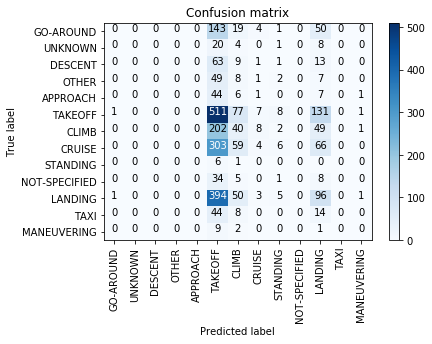

In [145]:
plot_confusion_matrix(confusion_matrix(target_test, predictions),set(target_test))

In [144]:
print("Accuracy: {}".format(np.array(metrics_xgb)[:,0].mean()))
print("F1-Score: {}".format(np.array(metrics_xgb)[:,1].mean()))
print("RocAUC-Score: {}".format(np.array(metrics_xgb)[:,2].mean()))

Accuracy: 0.3725880864371474
F1-Score: 0.28590534432573894
RocAUC-Score: 0.5077372832397108


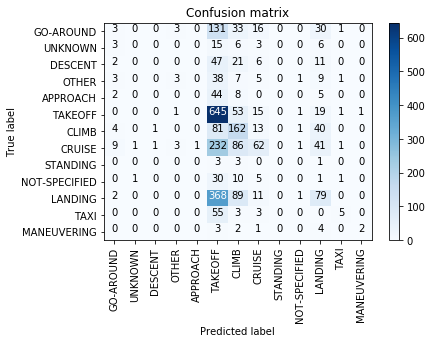

In [146]:
plot_confusion_matrix(confusion_matrix(target_test, predictions_xgb),set(target_test))

### Let's try binning into less categories

In [220]:
def display_metrics_score_sm(true, preds, proba, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds, labels = list(true.unique()), average='weighted')
    n_classes = len( list(set(target_small)))
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    true = label_binarize(true, classes=list(true.unique()))
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(true[:,i], proba[:, i].ravel())
        roc_auc[i] = auc(fpr[i], tpr[i])
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

     # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    for i in range(n_classes):
        print("RocAUC-Score : {}".format( roc_auc[i]))
    return acc, f1, roc_auc['macro'], fpr, tpr

In [148]:
target.value_counts()

LANDING          3707
TAKEOFF          2644
NOT-SPECIFIED    2156
MANEUVERING      1632
APPROACH         1130
CRUISE            401
TAXI              337
DESCENT           304
STANDING          264
GO-AROUND         244
CLIMB             211
UNKNOWN            56
OTHER              25
Name: broad_phase_of_flight, dtype: int64

In [181]:
IN_FLIGHT = ['CRUISE', 'GO-AROUND']
MANEUVERING = ['MANEUVERING', 'DESCENT', 'CLIMB']
ON_LAND = ['TAXI', 'STANDING']
OTHER = ['NOT-SPECIFIED', 'UNKNOWN', 'OTHER']
LANDING = ['LANDING', 'APPROACH']

In [182]:
target_small = target.apply(lambda x: 'IN_FLIGHT' if x in IN_FLIGHT else ('MANEUVERING' if x in MANEUVERING else ('ON_LAND' if x in ON_LAND else 'OTHER' if x in OTHER else ("LANDING" if x in LANDING else x))))

In [183]:
target_small.value_counts()

LANDING        4837
TAKEOFF        2644
OTHER          2237
MANEUVERING    2147
IN_FLIGHT       645
ON_LAND         601
Name: broad_phase_of_flight, dtype: int64

In [184]:
kf = KFold(n_splits=5,shuffle=True)

metrics_log = []

with tqdm_notebook(desc="Split", total=5) as progress:
    for train_index, test_index in tqdm(kf.split(ohe_df, target_small)):
        print(train_index,test_index)
        data_train, data_test = ohe_df.loc[train_index], ohe_df.loc[test_index] 
        target_train, target_test = target_small[train_index], target_small[test_index]
        clsf_log = LogisticRegression(random_state=2, solver='liblinear', multi_class='auto').fit(data_train, target_train)
        predictions = clsf_log.predict(data_test)
        probab=clsf_log.predict_proba(data_test)
        print(confusion_matrix(target_test, predictions))
        accuracy = clsf_log.score(data_test, target_test) 
        print (target_test.shape,probab.shape)
        target_names = list(target_small.unique())
        print(classification_report(target_test, predictions, target_names=target_names))
        acc_log, f1_log, roc_auc_log, fpr_log, tpr_log = display_metrics_score_sm(target_test, predictions, probab, clsf_log)
        metrics_log.append((acc_log, f1_log, roc_auc_log, fpr_log, tpr_log))
        progress.update(1)


0it [00:00, ?it/s]

[    0     1     3 ... 13107 13108 13109] [    2     7    19 ... 13101 13104 13110]



1it [00:00,  1.81it/s]

[[  1  76  34   0   9   9]
 [  4 787  85   2  27  36]
 [  0 155 214   1  35  29]
 [  0  91  10   9   7   1]
 [  4 269  93   3  67  24]
 [  2 379 106   1  13  40]]
(2623,) (2623, 6)
              precision    recall  f1-score   support

 MANEUVERING       0.09      0.01      0.01       129
     ON_LAND       0.45      0.84      0.58       941
     LANDING       0.39      0.49      0.44       434
     TAKEOFF       0.56      0.08      0.13       118
       OTHER       0.42      0.15      0.22       460
   IN_FLIGHT       0.29      0.07      0.12       541

    accuracy                           0.43      2623
   macro avg       0.37      0.27      0.25      2623
weighted avg       0.39      0.43      0.35      2623

Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='liblinear', to


2it [00:01,  1.82it/s]

[[  0  87  36   0   6   5]
 [  1 872  77   6  20  29]
 [  1 157 189   4  21  26]
 [  0  95   7   8   6   5]
 [  2 271  85   5  44  27]
 [  2 370  97   2  11  48]]
(2622,) (2622, 6)
              precision    recall  f1-score   support

 MANEUVERING       0.00      0.00      0.00       134
     ON_LAND       0.47      0.87      0.61      1005
     LANDING       0.38      0.47      0.43       398
     TAKEOFF       0.32      0.07      0.11       121
       OTHER       0.41      0.10      0.16       434
   IN_FLIGHT       0.34      0.09      0.14       530

    accuracy                           0.44      2622
   macro avg       0.32      0.27      0.24      2622
weighted avg       0.39      0.44      0.36      2622

Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='liblinear', to


3it [00:01,  1.84it/s]

[[  1  71  26   1   7  10]
 [  1 813  87   5  30  43]
 [  1 146 219   4  28  48]
 [  0 110   9   6   5   1]
 [  2 257  83   7  58  36]
 [  0 364  89   0   7  47]]
(2622,) (2622, 6)
              precision    recall  f1-score   support

 MANEUVERING       0.20      0.01      0.02       116
     ON_LAND       0.46      0.83      0.59       979
     LANDING       0.43      0.49      0.46       446
     TAKEOFF       0.26      0.05      0.08       131
       OTHER       0.43      0.13      0.20       443
   IN_FLIGHT       0.25      0.09      0.14       507

    accuracy                           0.44      2622
   macro avg       0.34      0.27      0.25      2622
weighted avg       0.39      0.44      0.36      2622

Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='liblinear', to


4it [00:02,  1.77it/s]

[[  2  70  37   1   5  17]
 [  2 828  68   4  18  40]
 [  0 171 217   1  17  32]
 [  0  83   9   9   5   1]
 [  2 293  97   3  46  32]
 [  2 342 110   1  16  41]]
(2622,) (2622, 6)
              precision    recall  f1-score   support

 MANEUVERING       0.25      0.02      0.03       132
     ON_LAND       0.46      0.86      0.60       960
     LANDING       0.40      0.50      0.44       438
     TAKEOFF       0.47      0.08      0.14       107
       OTHER       0.43      0.10      0.16       473
   IN_FLIGHT       0.25      0.08      0.12       512

    accuracy                           0.44      2622
   macro avg       0.38      0.27      0.25      2622
weighted avg       0.40      0.44      0.35      2622

Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='liblinear', to


5it [00:02,  1.92it/s]

[[  0  84  35   0   8   7]
 [  2 823  73   6  20  28]
 [  1 170 190  10  34  26]
 [  0  90  17   8   6   3]
 [  0 271  77   3  56  20]
 [  2 405  90   1  19  37]]
(2622,) (2622, 6)
              precision    recall  f1-score   support

 MANEUVERING       0.00      0.00      0.00       134
     ON_LAND       0.45      0.86      0.59       952
     LANDING       0.39      0.44      0.42       431
     TAKEOFF       0.29      0.06      0.11       124
       OTHER       0.39      0.13      0.20       427
   IN_FLIGHT       0.31      0.07      0.11       554

    accuracy                           0.42      2622
   macro avg       0.30      0.26      0.24      2622
weighted avg       0.37      0.42      0.34      2622

Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='liblinear', to

In [185]:
print("Accuracy: {}".format(np.array(metrics_log)[:,0].mean()))
print("F1-Score: {}".format(np.array(metrics_log)[:,1].mean()))
print("RocAUC-Score: {}".format(np.array(metrics_log)[:,2].mean()))

Accuracy: 0.43322454389716275
F1-Score: 0.35426882937653065
RocAUC-Score: 0.48362488034166606


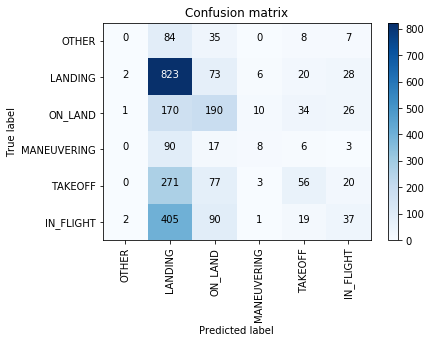

In [186]:
plot_confusion_matrix(confusion_matrix(target_test, predictions),set(target_test))

In [187]:
kf = KFold(n_splits=5,shuffle=True)

metrics_rf = []

with tqdm_notebook(desc="Split", total=5) as progress:
    for train_index, test_index in tqdm(kf.split(ohe_df, target_small)):
        print(train_index,test_index)
        data_train, data_test = ohe_df.loc[train_index], ohe_df.loc[test_index] 
        target_train, target_test = target_small[train_index], target_small[test_index]
        rnd_forest = RandomForestClassifier(random_state = 42).fit(data_train, target_train)
        predictions = rnd_forest.predict(data_test)
        probab_rf=rnd_forest.predict_proba(data_test)
        print(confusion_matrix(target_test, predictions))
        accuracy = rnd_forest.score(data_test, target_test) 
        target_names = list(target_small.unique())
        print(classification_report(target_test, predictions, target_names=target_names))
        acc_rf, f1_rf, roc_auc_rf, fpr_rf, tpr_rf = display_metrics_score_sm(target_test, predictions, probab_rf, rnd_forest)
        metrics_rf.append((acc_rf, f1_rf, roc_auc_rf, fpr_rf, tpr_rf))
        progress.update(1)


0it [00:00, ?it/s]//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[    0     1     2 ... 13108 13109 13110] [    3    11    12 ... 13097 13101 13104]



1it [00:00,  1.70it/s]

[[  3  62  20   1  23  20]
 [ 22 626  83  12  85 167]
 [ 12 134 160   6  62  66]
 [  1  70  12  11  19  22]
 [ 12 196  69  13  79  62]
 [ 16 255  60  12  58  92]]
              precision    recall  f1-score   support

 MANEUVERING       0.05      0.02      0.03       129
     ON_LAND       0.47      0.63      0.54       995
     LANDING       0.40      0.36      0.38       440
     TAKEOFF       0.20      0.08      0.12       135
       OTHER       0.24      0.18      0.21       431
   IN_FLIGHT       0.21      0.19      0.20       493

    accuracy                           0.37      2623
   macro avg       0.26      0.24      0.24      2623
weighted avg       0.34      0.37      0.35      2623

Model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)

2it [00:01,  1.70it/s]

[[  6  58  28   6  11  26]
 [ 23 596  84  28  87 129]
 [  8 126 165   8  67  68]
 [  5  57  13  14  13  10]
 [ 10 186  68  12 111  58]
 [ 21 272  77   9  54 108]]
              precision    recall  f1-score   support

 MANEUVERING       0.08      0.04      0.06       135
     ON_LAND       0.46      0.63      0.53       947
     LANDING       0.38      0.37      0.38       442
     TAKEOFF       0.18      0.12      0.15       112
       OTHER       0.32      0.25      0.28       445
   IN_FLIGHT       0.27      0.20      0.23       541

    accuracy                           0.38      2622
   macro avg       0.28      0.27      0.27      2622
weighted avg       0.35      0.38      0.36      2622

Model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)

3it [00:01,  1.68it/s]

[[  7  59  17   1  16  22]
 [ 22 601  79  23 103 134]
 [  9 127 156   9  53  61]
 [  0  57  24  15  10  19]
 [ 17 209  72   9  96  56]
 [ 13 286  78   9  57  96]]
              precision    recall  f1-score   support

 MANEUVERING       0.10      0.06      0.07       122
     ON_LAND       0.45      0.62      0.52       962
     LANDING       0.37      0.38      0.37       415
     TAKEOFF       0.23      0.12      0.16       125
       OTHER       0.29      0.21      0.24       459
   IN_FLIGHT       0.25      0.18      0.21       539

    accuracy                           0.37      2622
   macro avg       0.28      0.26      0.26      2622
weighted avg       0.34      0.37      0.35      2622

Model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)

4it [00:02,  1.80it/s]

[[  7  64  33   1  18  20]
 [ 20 602  79  17 108 145]
 [  9 133 156   4  39  66]
 [  1  56  14  12  12  11]
 [  9 202  74  11  84  71]
 [ 21 262  97   4  56 104]]
              precision    recall  f1-score   support

 MANEUVERING       0.10      0.05      0.07       143
     ON_LAND       0.46      0.62      0.53       971
     LANDING       0.34      0.38      0.36       407
     TAKEOFF       0.24      0.11      0.15       106
       OTHER       0.26      0.19      0.22       451
   IN_FLIGHT       0.25      0.19      0.22       544

    accuracy                           0.37      2622
   macro avg       0.28      0.26      0.26      2622
weighted avg       0.34      0.37      0.34      2622

Model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)

5it [00:02,  1.91it/s]

[[  4  64  13   4  10  21]
 [ 26 592  81  26  99 138]
 [ 14 148 166   9  42  64]
 [  2  72  17  10  10  12]
 [ 16 184  79   7 104  61]
 [  9 276  80  11  47 104]]
              precision    recall  f1-score   support

 MANEUVERING       0.06      0.03      0.04       116
     ON_LAND       0.44      0.62      0.52       962
     LANDING       0.38      0.37      0.38       443
     TAKEOFF       0.15      0.08      0.11       123
       OTHER       0.33      0.23      0.27       451
   IN_FLIGHT       0.26      0.20      0.22       527

    accuracy                           0.37      2622
   macro avg       0.27      0.26      0.26      2622
weighted avg       0.35      0.37      0.35      2622

Model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_

In [188]:
print("Accuracy: {}".format(np.array(metrics_rf)[:,0].mean()))
print("F1-Score: {}".format(np.array(metrics_rf)[:,1].mean()))
print("RocAUC-Score: {}".format(np.array(metrics_rf)[:,2].mean()))

Accuracy: 0.3727406417384441
F1-Score: 0.349462853507998
RocAUC-Score: 0.5083630938119279


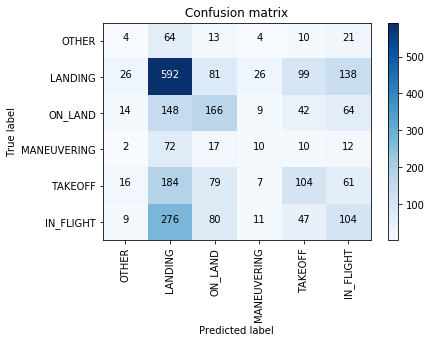

In [189]:
plot_confusion_matrix(confusion_matrix(target_test, predictions),set(target_test))

### Maybe SMOTE?

In [190]:
smt = SMOTE()
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(ohe_df, target_small, test_size = 0.2)

X_train_small, y_train_small = smt.fit_sample(X_train_small, y_train_small)

In [191]:
clsf_log = LogisticRegression(random_state=2, solver='liblinear', multi_class='auto').fit(X_train_small, y_train_small)
predictions = clsf_log.predict(X_test_small)
proba = clsf_log.predict_proba(X_test_small)
display_metrics_score_sm(y_test_small, predictions, proba, clsf_log);

Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy: 0.27906976744186046
F1-Score: 0.30442614787101685
RocAUC-Score : 0.6247368267576474
RocAUC-Score : 0.6780893207511913
RocAUC-Score : 0.5092658646812579
RocAUC-Score : 0.37255312020405074
RocAUC-Score : 0.5696809426801528
RocAUC-Score : 0.4240638603086664


In [194]:
pd.Series(y_train_small).value_counts()

ON_LAND        3864
TAKEOFF        3864
MANEUVERING    3864
OTHER          3864
LANDING        3864
IN_FLIGHT      3864
dtype: int64

In [198]:
kf = KFold(n_splits=5,shuffle=True)

metrics_log_sm = []

with tqdm_notebook(desc="Split", total=5) as progress:
    for train_index, test_index in tqdm(kf.split(X_train_small, y_train_small)):
        print(train_index,test_index)
        data_train, data_test = pd.DataFrame(X_train_small).loc[train_index], pd.DataFrame(X_train_small).loc[test_index] 
        target_train, target_test = pd.Series(y_train_small)[train_index], pd.Series(y_train_small)[test_index]
        clsf_log = LogisticRegression(random_state=2, solver='liblinear', multi_class='auto').fit(data_train, target_train)
        predictions = clsf_log.predict(X_test_small)
        probab=clsf_log.predict_proba(X_test_small)
        print(confusion_matrix(y_test_small, predictions))
        accuracy = clsf_log.score(X_test_small, y_test_small) 
        print (X_test_small.shape,probab.shape)
        target_names = list(target_small.unique())
        print(classification_report(y_test_small, predictions, target_names=target_names))
        acc_log, f1_log, roc_auc_log, fpr_log, tpr_log = display_metrics_score_sm(y_test_small, predictions, probab, clsf_log)
        metrics_log_sm.append((acc_log, f1_log, roc_auc_log, fpr_log, tpr_log))
        progress.update(1)



0it [00:00, ?it/s]

[    1     2     3 ... 23181 23182 23183] [    0    15    18 ... 23169 23177 23179]




1it [00:00,  1.05it/s]

[[ 39  18  28  18  13  22]
 [139 272  84 256  61 161]
 [ 53  37 207  47  34  42]
 [ 12  16   8  37   6  17]
 [ 84  64  75  91  88  67]
 [ 91  82  92 104  53 105]]
(2623, 177) (2623, 6)
              precision    recall  f1-score   support

 MANEUVERING       0.09      0.28      0.14       138
     ON_LAND       0.56      0.28      0.37       973
     LANDING       0.42      0.49      0.45       420
     TAKEOFF       0.07      0.39      0.11        96
       OTHER       0.35      0.19      0.24       469
   IN_FLIGHT       0.25      0.20      0.22       527

    accuracy                           0.29      2623
   macro avg       0.29      0.30      0.26      2623
weighted avg       0.39      0.29      0.31      2623

Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='liblinear'



2it [00:01,  1.02it/s]

[[ 46  21  26  17  11  17]
 [151 265  82 255  57 163]
 [ 55  40 202  46  32  45]
 [ 12  19  12  37   5  11]
 [ 85  67  76  93  82  66]
 [ 96  87  92  98  48 106]]
(2623, 177) (2623, 6)
              precision    recall  f1-score   support

 MANEUVERING       0.10      0.33      0.16       138
     ON_LAND       0.53      0.27      0.36       973
     LANDING       0.41      0.48      0.44       420
     TAKEOFF       0.07      0.39      0.12        96
       OTHER       0.35      0.17      0.23       469
   IN_FLIGHT       0.26      0.20      0.23       527

    accuracy                           0.28      2623
   macro avg       0.29      0.31      0.26      2623
weighted avg       0.39      0.28      0.30      2623

Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='liblinear'



3it [00:03,  1.01it/s]

[[ 46  16  29  17  11  19]
 [152 263  76 262  62 158]
 [ 54  35 200  48  38  45]
 [ 14  21  10  34   5  12]
 [ 89  59  71  96  83  71]
 [ 98  86  99 101  47  96]]
(2623, 177) (2623, 6)
              precision    recall  f1-score   support

 MANEUVERING       0.10      0.33      0.16       138
     ON_LAND       0.55      0.27      0.36       973
     LANDING       0.41      0.48      0.44       420
     TAKEOFF       0.06      0.35      0.10        96
       OTHER       0.34      0.18      0.23       469
   IN_FLIGHT       0.24      0.18      0.21       527

    accuracy                           0.28      2623
   macro avg       0.28      0.30      0.25      2623
weighted avg       0.39      0.28      0.30      2623

Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='liblinear'



4it [00:04,  1.00it/s]

[[ 41  20  30  18  10  19]
 [145 262  80 252  64 170]
 [ 52  40 207  46  36  39]
 [ 12  22  11  34   4  13]
 [ 89  70  73  91  77  69]
 [ 96  81  95 106  49 100]]
(2623, 177) (2623, 6)
              precision    recall  f1-score   support

 MANEUVERING       0.09      0.30      0.14       138
     ON_LAND       0.53      0.27      0.36       973
     LANDING       0.42      0.49      0.45       420
     TAKEOFF       0.06      0.35      0.11        96
       OTHER       0.32      0.16      0.22       469
   IN_FLIGHT       0.24      0.19      0.21       527

    accuracy                           0.27      2623
   macro avg       0.28      0.29      0.25      2623
weighted avg       0.38      0.27      0.30      2623

Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='liblinear'



5it [00:05,  1.01s/it]

[[ 42  18  27  19  11  21]
 [137 269  85 253  71 158]
 [ 51  36 204  44  40  45]
 [ 12  18  12  36   6  12]
 [ 82  63  77  93  85  69]
 [ 90  91  94  99  52 101]]
(2623, 177) (2623, 6)
              precision    recall  f1-score   support

 MANEUVERING       0.10      0.30      0.15       138
     ON_LAND       0.54      0.28      0.37       973
     LANDING       0.41      0.49      0.44       420
     TAKEOFF       0.07      0.38      0.11        96
       OTHER       0.32      0.18      0.23       469
   IN_FLIGHT       0.25      0.19      0.22       527

    accuracy                           0.28      2623
   macro avg       0.28      0.30      0.25      2623
weighted avg       0.38      0.28      0.30      2623

Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='liblinear'

In [199]:
print("Accuracy: {}".format(np.array(metrics_log_sm)[:,0].mean()))
print("F1-Score: {}".format(np.array(metrics_log_sm)[:,1].mean()))
print("RocAUC-Score: {}".format(np.array(metrics_log_sm)[:,2].mean()))

Accuracy: 0.2795272588638963
F1-Score: 0.3033795072767297
RocAUC-Score: 0.5295793353558025


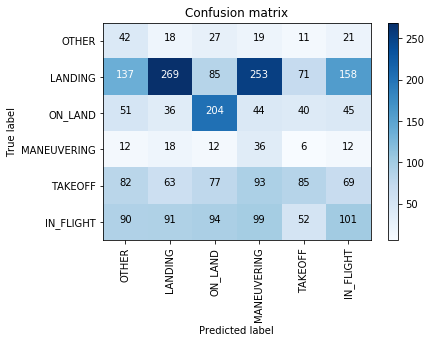

In [201]:
plot_confusion_matrix(confusion_matrix(y_test_small, predictions),set(target_small))

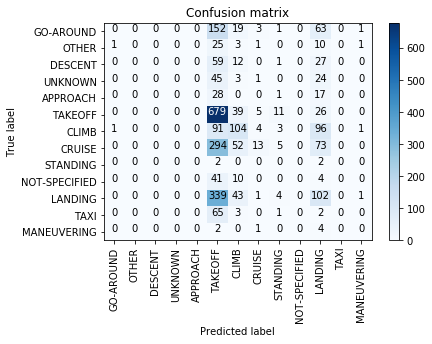

In [137]:
plot_confusion_matrix(confusion_matrix(target_test, predictions),set(target_test))

### Binary problem

In [227]:
def display_metrics_score_bin(true, preds, proba, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds, pos_label='LANDING')
    fpr, tpr, _ = roc_curve(true.ravel(), proba[:,1].ravel(), pos_label='LANDING')
    roc_auc = auc(fpr, tpr)
    print(classification_report(true, preds))
#     rocauc = roc_auc_score(true, pred_prob)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    print("RocAUC-Score: {}".format(roc_auc))
    return acc, f1, roc_auc, fpr, tpr

In [ ]:
LANDING = ['LANDING', 'APPROACH']

In [204]:
target_land = target.apply(lambda x: 'LANDING' if x in LANDING else ()'OTHER')

In [205]:
target_land.value_counts()

OTHER      8274
LANDING    4837
Name: broad_phase_of_flight, dtype: int64

In [228]:
kf = KFold(n_splits=5,shuffle=True)

metrics_log = []

with tqdm_notebook(desc="Split", total=5) as progress:
    for train_index, test_index in tqdm(kf.split(ohe_df, target_land)):
        print(train_index,test_index)
        data_train, data_test = ohe_df.loc[train_index], ohe_df.loc[test_index] 
        target_train, target_test = target_land[train_index], target_land[test_index]
        clsf_log = LogisticRegression(random_state=2, solver='liblinear', multi_class='auto').fit(data_train, target_train)
        predictions = clsf_log.predict(data_test)
        probab=clsf_log.predict_proba(data_test)
        print(confusion_matrix(target_test, predictions))
        accuracy = clsf_log.score(data_test, target_test) 
        print (target_test.shape,probab.shape)
        target_names = list(target_land.unique())
        print(classification_report(target_test, predictions, target_names=target_names))
        acc_log, f1_log, roc_auc_log, fpr_log, tpr_log = display_metrics_score_bin(target_test, predictions, probab, clsf_log)
        metrics_log.append((acc_log, f1_log, roc_auc_log, fpr_log, tpr_log))
        progress.update(1)



0it [00:00, ?it/s]

[    1     2     3 ... 13108 13109 13110] [    0     8    10 ... 13088 13090 13103]
[[ 317  667]
 [ 261 1378]]
(2623,) (2623, 2)




1it [00:00,  2.66it/s]

              precision    recall  f1-score   support

       OTHER       0.55      0.32      0.41       984
     LANDING       0.67      0.84      0.75      1639

    accuracy                           0.65      2623
   macro avg       0.61      0.58      0.58      2623
weighted avg       0.63      0.65      0.62      2623

              precision    recall  f1-score   support

     LANDING       0.55      0.32      0.41       984
       OTHER       0.67      0.84      0.75      1639

    accuracy                           0.65      2623
   macro avg       0.61      0.58      0.58      2623
weighted avg       0.63      0.65      0.62      2623

Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy: 0.



2it [00:00,  2.41it/s]

              precision    recall  f1-score   support

     LANDING       0.51      0.32      0.39       942
       OTHER       0.68      0.83      0.75      1680

    accuracy                           0.65      2622
   macro avg       0.60      0.57      0.57      2622
weighted avg       0.62      0.65      0.62      2622

Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy: 0.6460717009916095
F1-Score: 0.39346405228758163
RocAUC-Score: 0.3265013648771611
[    0     1     3 ... 13105 13107 13110] [    2     4     5 ... 13106 13108 13109]
[[ 314  668]
 [ 249 1391]]
(2622,) (2622, 2)




3it [00:01,  2.54it/s]

              precision    recall  f1-score   support

       OTHER       0.56      0.32      0.41       982
     LANDING       0.68      0.85      0.75      1640

    accuracy                           0.65      2622
   macro avg       0.62      0.58      0.58      2622
weighted avg       0.63      0.65      0.62      2622

              precision    recall  f1-score   support

     LANDING       0.56      0.32      0.41       982
       OTHER       0.68      0.85      0.75      1640

    accuracy                           0.65      2622
   macro avg       0.62      0.58      0.58      2622
weighted avg       0.63      0.65      0.62      2622

Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy: 0.



4it [00:01,  2.51it/s]

              precision    recall  f1-score   support

     LANDING       0.55      0.28      0.37       992
       OTHER       0.66      0.86      0.75      1630

    accuracy                           0.64      2622
   macro avg       0.61      0.57      0.56      2622
weighted avg       0.62      0.64      0.61      2622

Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy: 0.641113653699466
F1-Score: 0.37308461025982675
RocAUC-Score: 0.31904839946566393
[    0     1     2 ... 13108 13109 13110] [   13    14    15 ... 13098 13102 13107]
[[ 305  632]
 [ 306 1379]]
(2622,) (2622, 2)
              precision    recall  f1-score   support

       OTHER       0.50      0.33      0.39       937
     LAND



5it [00:01,  2.74it/s]

              precision    recall  f1-score   support

     LANDING       0.50      0.33      0.39       937
       OTHER       0.69      0.82      0.75      1685

    accuracy                           0.64      2622
   macro avg       0.59      0.57      0.57      2622
weighted avg       0.62      0.64      0.62      2622

Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy: 0.6422578184591915
F1-Score: 0.39405684754521964
RocAUC-Score: 0.3337550551194069



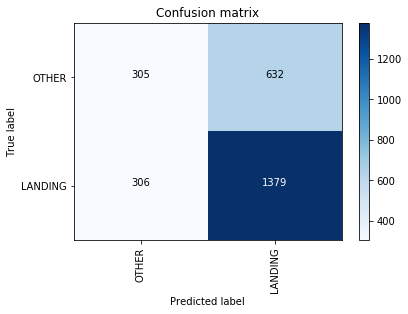

In [230]:
plot_confusion_matrix(confusion_matrix(target_test, predictions),set(target_land))

In [231]:
smt = SMOTE()
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(ohe_df, target_land, test_size = 0.2)

X_train_small, y_train_small = smt.fit_sample(X_train_small, y_train_small)

clsf_log = LogisticRegression(random_state=2, solver='liblinear', multi_class='auto').fit(X_train_small, y_train_small)
predictions = clsf_log.predict(X_test_small)
proba = clsf_log.predict_proba(X_test_small)
display_metrics_score_bin(y_test_small, predictions, proba, clsf_log);

              precision    recall  f1-score   support

     LANDING       0.47      0.75      0.58       959
       OTHER       0.78      0.51      0.62      1664

    accuracy                           0.60      2623
   macro avg       0.63      0.63      0.60      2623
weighted avg       0.67      0.60      0.60      2623

Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy: 0.5974075486084636
F1-Score: 0.5779376498800959
RocAUC-Score: 0.32577849272078285


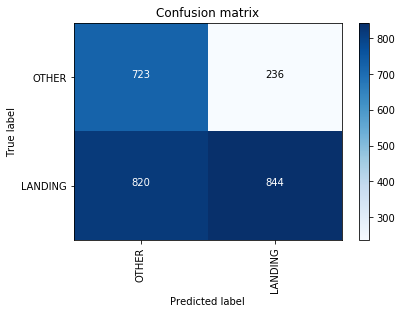

In [232]:
plot_confusion_matrix(confusion_matrix(y_test_small, predictions),set(target_land))